<a href="https://colab.research.google.com/github/palmaluisen/Modal-split-model-pred/blob/main/Modal_split_predictions_using_Biogeme_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ajuste de Modelos de Reparto con librería Biogeme

In [97]:
!pip install biogeme

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [99]:
_#Load libraries
import pandas as pd
import numpy as np
import biogeme.database as db
import biogeme.biogeme as bio
import biogeme.models as models
from biogeme.expressions import Beta

import matplotlib.pyplot as plt

In [100]:
# Load created class
import os
os.chdir("/content/gdrive/MyDrive/TFM/Script/")
from Logit_model_pred import Logit_model_pred

In [101]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
#warnings.simplefilter(action='ignore', category=VisibleDeprecationWarning)

In [102]:
df_train=pd.read_excel("/content/gdrive/MyDrive/TFM/Script/df_clean_train.xlsx")
df_train=df_train.iloc[:,1:] #Eliminar primera columna inncesaria
df_train.head().T

0        1       2       3        4
SEXO_m                             1.00     1.00    1.00    1.00     1.00
ESTUDIOS_primaria_terminada        1.00     1.00    0.00    0.00     0.00
ESTUDIOS_secundaria_terminada      0.00     0.00    0.00    1.00     0.00
ESTUDIOS_formacion_profesional     0.00     0.00    0.00    0.00     1.00
ESTUDIOS_univers_terminada         0.00     0.00    1.00    0.00     0.00
ESTUDIOS_posgrado                  0.00     0.00    0.00    0.00     0.00
VIAJE_OBLIGADO_si                  0.00     1.00    0.00    0.00     0.00
MOTIVO_hbo                         1.00     0.00    1.00    1.00     1.00
MOTIVO_hbws                        0.00     1.00    0.00    0.00     0.00
EDAD                              30.00    51.00   52.00   29.00    53.00
DIST_KM                            5.84    11.20    0.00   13.78    10.09
TIEMPO_CAR                        17.90    20.52   12.26   21.25    22.42
COSTE_CAR                          4.62     6.56    2.50    5.94     6.16
TIEMPO_BUS                        24.56    33.17   10.06   28.33    30.93
COSTE_BUS                          2.27     3.44    1.00    3.07     3.20
TIEMPO_BP                         29.53    52.03    5.00   49.50    47.38
COSTE_BP                           0.08     0.16    0.00    0.14     0.15
CAR                                1.00     1.00    1.00    1.00     1.00
BUS                                1.00     1.00    1.00    1.00     1.00
BP                                 1.00     1.00    1.00    1.00     1.00
custom_id                       1347.00  1333.00  370.00  118.00  1360.00
CHOICE                             0.00     0.00    0.00    0.00     1.00

In [103]:
# Crear df data con variables a utilizar en el modelo Biogeme
data=df_train.copy()#[['COSTE_CAR', 'TIEMPO_CAR','COSTE_BUS','TIEMPO_BUS', 'TIEMPO_BP','COSTE_BP','CHOICE']]

In [104]:
df_test=pd.read_excel("/content/gdrive/MyDrive/TFM/Script/df_clean_test.xlsx")
df_test=df_test.iloc[:,1:] #Eliminar primera columna inncesaria
df_test.head().T

0       1        2        3       4
SEXO_m                            1.00    1.00     0.00     1.00    1.00
ESTUDIOS_primaria_terminada       0.00    0.00     0.00     0.00    0.00
ESTUDIOS_secundaria_terminada     0.00    1.00     1.00     1.00    0.00
ESTUDIOS_formacion_profesional    1.00    0.00     0.00     0.00    1.00
ESTUDIOS_univers_terminada        0.00    0.00     0.00     0.00    0.00
ESTUDIOS_posgrado                 0.00    0.00     0.00     0.00    0.00
VIAJE_OBLIGADO_si                 0.00    0.00     0.00     1.00    0.00
MOTIVO_hbo                        1.00    1.00     1.00     0.00    1.00
MOTIVO_hbws                       0.00    0.00     0.00     1.00    0.00
EDAD                             47.00   71.00    45.00    63.00   37.00
DIST_KM                           8.28    2.57     1.16     9.81    5.31
TIEMPO_CAR                       18.71   12.74    11.34    18.96   18.43
COSTE_CAR                         5.50    3.43     2.92     6.06    4.43
TIEMPO_BUS                       32.03   15.66    19.55    31.45   27.92
COSTE_BUS                         2.80    1.56     1.25     3.13    2.16
TIEMPO_BP                        39.76   15.79     9.86    46.18   27.31
COSTE_BP                          0.12    0.04     0.02     0.14    0.08
CAR                               1.00    1.00     1.00     1.00    1.00
BUS                               1.00    1.00     1.00     1.00    1.00
BP                                1.00    1.00     1.00     1.00    1.00
custom_id                       359.00  492.00  1518.00  1346.00  918.00
CHOICE                            0.00    0.00     0.00     0.00    0.00

## Modelo de reparto modal 
El usuario le da diferente valor al tiempo viajando en los distintos modos de transporte
### Modelo 1

In [105]:
#Crear el Database de Biogeme a partir del df
database = db.Database('Modelo 1', data)

# The following statement allows you to use the names of the
# variable as Python variable.
globals().update(database.variables)

# Removing some observations
#exclude = No se eliminarán observaciones
#database.remove(exclude)

# Parameters to be estimated
# Arguments:
#   1  Name for report. Typically, the same as the variable
#   2  Starting value
#   3  Lower bound
#   4  Upper bound
#   5  0: estimate the parameter, 1: keep it fixed

ASC_CAR = Beta('ASC_CAR', 0, None, None, 0)
ASC_BUS = Beta('ASC_BUS', 0, None, None, 0)
ASC_BP = Beta('ASC_BP', 0, None, None, 0)
B_TIME_CAR = Beta('B_TIME_CAR', 0, None, None, 0)
B_COST_CAR = Beta('B_COST_CAR', 0, None, None, 0)
B_TIME_BUS = Beta('B_TIME_BUS', 0, None, None, 0)
B_COST_BUS = Beta('B_COST_BUS', 0, None, None, 0)
B_TIME_BP = Beta('B_TIME_BP', 0, None, None, 0)
B_COST_BP = Beta('B_COST_BP', 0, None, None, 0)

B_EDAD_CAR = Beta('B_EDAD_CAR', 0, None, None, 0)
B_EDAD_BUS = Beta('B_EDAD_BUS', 0, None, None, 0)
B_EDAD_BP = Beta('B_EDAD_BP', 0, None, None, 0)
B_SEXO_m_CAR = Beta('B_SEXO_m_CAR', 0, None, None, 0)
B_SEXO_m_BUS = Beta('B_SEXO_m_BUS', 0, None, None, 0)
B_SEXO_m_BP = Beta('B_SEXO_m_BP', 0, None, None, 0)
B_DIST_CAR = Beta('B_DIST_CAR', 0, None, None, 0)
B_DIST_BUS = Beta('B_DIST_BUS', 0, None, None, 0)
B_DIST_BP = Beta('B_DIST_BP', 0, None, None, 0)
B_MOTIVO_hbo_CAR = Beta('B_MOTIVO_hbo_CAR', 0, None, None, 0)
B_MOTIVO_hbo_BUS = Beta('B_MOTIVO_hbo_BUS', 0, None, None, 0)
B_MOTIVO_hbo_BP = Beta('B_MOTIVO_hbo_BP', 0, None, None, 0)
B_MOTIVO_hbws_CAR = Beta('B_MOTIVO_hbws_CAR', 0, None, None, 0)
B_MOTIVO_hbws_BUS = Beta('B_MOTIVO_hbws_BUS', 0, None, None, 0)
B_MOTIVO_hbws_BP = Beta('B_MOTIVO_hbws_BP', 0, None, None, 0)
B_ESTUDIOS_pri_termi_CAR = Beta('B_ESTUDIOS_pri_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_pri_termi_BUS = Beta('B_ESTUDIOS_pri_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_pri_termi_BP = Beta('B_ESTUDIOS_pri_termi_BP', 0, None, None, 0)
B_ESTUDIOS_sec_termi_CAR = Beta('B_ESTUDIOS_sec_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_sec_termi_BUS = Beta('B_ESTUDIOS_sec_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_sec_termi_BP = Beta('B_ESTUDIOS_sec_termi_BP', 0, None, None, 0)
B_ESTUDIOS_forma_pro_CAR = Beta('B_ESTUDIOS_forma_pro_CAR', 0, None, None, 0)
B_ESTUDIOS_forma_pro_BUS = Beta('B_ESTUDIOS_forma_pro_BUS', 0, None, None, 0)
B_ESTUDIOS_forma_pro_BP = Beta('B_ESTUDIOS_forma_pro_BP', 0, None, None, 0)
B_ESTUDIOS_uni_termi_CAR = Beta('B_ESTUDIOS_uni_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_uni_termi_BUS = Beta('B_ESTUDIOS_uni_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_uni_termi_BP = Beta('B_ESTUDIOS_uni_termi_BP', 0, None, None, 0)
B_ESTUDIOS_posgrado_CAR = Beta('B_ESTUDIOS_posgrado_CAR', 0, None, None, 0)
B_ESTUDIOS_posgrado_BUS = Beta('B_ESTUDIOS_posgrado_BUS', 0, None, None, 0)
B_ESTUDIOS_posgrado_BP = Beta('B_ESTUDIOS_posgrado_BP', 0, None, None, 0)
B_VIAJE_OBLI_si_CAR = Beta('B_VIAJE_OBLI_si_CAR', 0, None, None, 0)
B_VIAJE_OBLI_si_BUS = Beta('B_VIAJE_OBLI_si_BUS', 0, None, None, 0)
B_VIAJE_OBLI_si_BP = Beta('B_VIAJE_OBLI_si_BP', 0, None, None, 0)
...

# Definition of the utility functions
CAR = ASC_CAR + B_COST_CAR*COSTE_CAR + B_TIME_CAR*TIEMPO_CAR + \
B_EDAD_CAR*EDAD + B_SEXO_m_CAR*SEXO_m + B_DIST_CAR*DIST_KM + \
B_MOTIVO_hbo_CAR*MOTIVO_hbo + B_MOTIVO_hbws_CAR*MOTIVO_hbws + \
B_ESTUDIOS_pri_termi_CAR*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_CAR*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_CAR*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_CAR*ESTUDIOS_univers_terminada + \
B_ESTUDIOS_posgrado_CAR*ESTUDIOS_posgrado + \
B_VIAJE_OBLI_si_CAR*VIAJE_OBLIGADO_si

BUS = ASC_BUS + B_COST_BUS*COSTE_BUS + B_TIME_BUS*TIEMPO_BUS + \
B_EDAD_BUS*EDAD + B_SEXO_m_BUS*SEXO_m + B_DIST_BUS*DIST_KM + \
B_MOTIVO_hbo_BUS*MOTIVO_hbo + B_MOTIVO_hbws_BUS*MOTIVO_hbws + \
B_ESTUDIOS_pri_termi_BUS*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_BUS*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_BUS*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_BUS*ESTUDIOS_univers_terminada + \
B_ESTUDIOS_posgrado_BUS*ESTUDIOS_posgrado + \
B_VIAJE_OBLI_si_BUS*VIAJE_OBLIGADO_si

BP = ASC_BP + B_COST_BP*COSTE_BP + B_TIME_BP*TIEMPO_BP + \
B_EDAD_BP*EDAD + B_SEXO_m_BP*SEXO_m + B_DIST_BP*DIST_KM + \
B_MOTIVO_hbo_BP*MOTIVO_hbo + B_MOTIVO_hbws_BP*MOTIVO_hbws + \
B_ESTUDIOS_pri_termi_BP*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_BP*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_BP*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_BP*ESTUDIOS_univers_terminada + \
B_ESTUDIOS_posgrado_BP*ESTUDIOS_posgrado + \
B_VIAJE_OBLI_si_BP*VIAJE_OBLIGADO_si

# Associate utility functions with the numbering of alternatives
V = {0: CAR, 1: BUS, 2: BP}

# The choice model is a logit, without availability conditions
logprob = models.loglogit(V, None, CHOICE)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = "MODELO 1"

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults.round(4))

                            Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_BP                   -28.3709       22.1012      -1.2837        0.1993
ASC_BUS                   11.2913        2.1425       5.2703        0.0000
ASC_CAR                   17.0796       20.2190       0.8447        0.3983
B_COST_BP                 24.1941       69.8255       0.3465        0.7290
B_COST_BUS               -10.1485       36.8494      -0.2754        0.7830
B_COST_CAR                -5.7511       22.1111      -0.2601        0.7948
B_DIST_BP                  0.6542        1.8881       0.3465        0.7290
B_DIST_BUS                -0.3135        0.9448      -0.3319        0.7400
B_DIST_CAR                -0.3406        0.9449      -0.3605        0.7185
B_EDAD_BP                  0.0015        0.0125       0.1168        0.9070
B_EDAD_BUS                -0.0098        0.0093      -1.0510        0.2932
B_EDAD_CAR                 0.0083        0.0071       1.1645        0.2442
B_ESTUDIOS_forma_pro_BP  

              precision    recall  f1-score   support

         car       0.87      1.00      0.93       416
         bus       0.00      0.00      0.00        48
          bp       0.00      0.00      0.00        13

    accuracy                           0.87       477
   macro avg       0.29      0.33      0.31       477
weighted avg       0.76      0.87      0.81       477



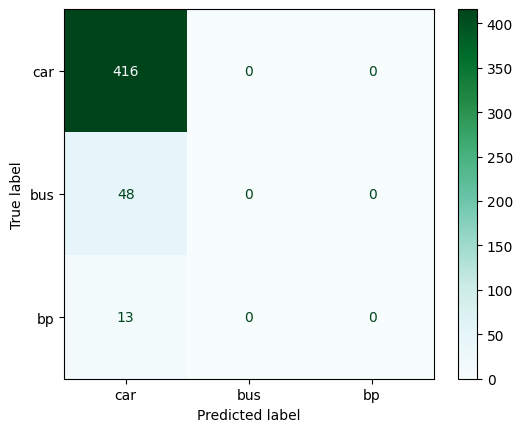

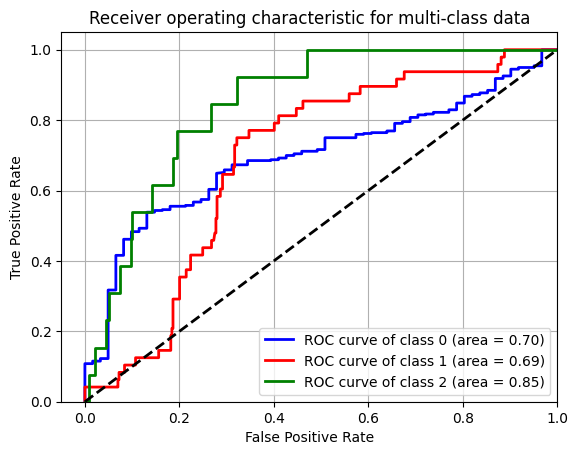

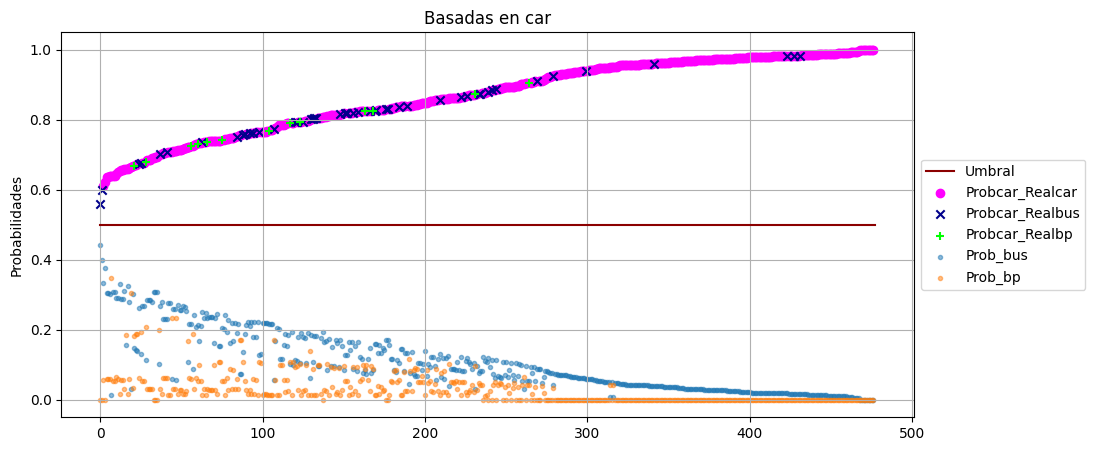

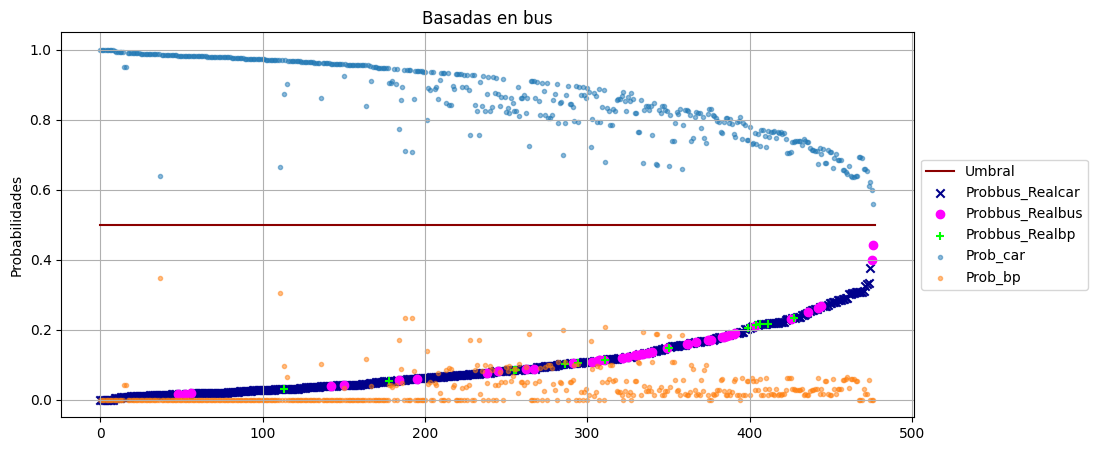

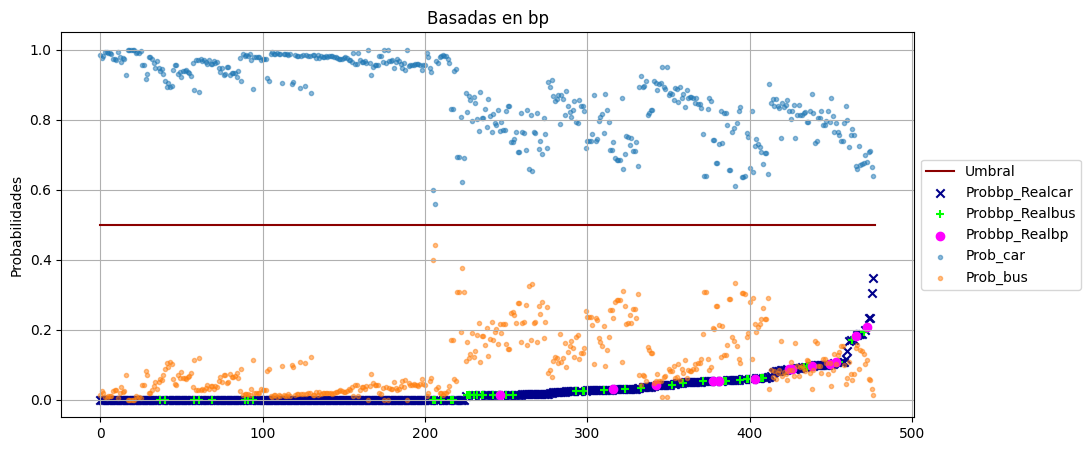

In [106]:
Display_Preds = Logit_model_pred(pandasResults, V, df_test, ['car', 'bus', 'bp'])
Display_Preds.probs_pred_MNL()
Display_Preds.probs
Display_Preds.classification_report()
Display_Preds.confusion_matrix_display()
Display_Preds.ROC_curve()
# # Display_Preds.Precision_Recall_curve()
Display_Preds.Comparative_plot(0)
Display_Preds.Comparative_plot(1)
Display_Preds.Comparative_plot(2)

### Modelo 2

El modelo 2 consiste en depurar el modelo 1 hasta que sus parámetros sean significativos. 

In [107]:
#Crear el Database de Biogeme a partir del df
database = db.Database('Modelo 2', data)

# The following statement allows you to use the names of the
# variable as Python variable.
globals().update(database.variables)

# Removing some observations
#exclude = No se eliminarán observaciones
#database.remove(exclude)

# Parameters to be estimated
# Arguments:
#   1  Name for report. Typically, the same as the variable
#   2  Starting value
#   3  Lower bound
#   4  Upper bound
#   5  0: estimate the parameter, 1: keep it fixed

ASC_CAR = Beta('ASC_CAR', 0, None, None, 0)
ASC_BUS = Beta('ASC_BUS', 0, None, None, 0)
ASC_BP = Beta('ASC_BP', 0, None, None, 0)
#B_TIME_CAR = Beta('B_TIME_CAR', 0, None, None, 0)
#B_COST_CAR = Beta('B_COST_CAR', 0, None, None, 0)
B_TIME_BUS = Beta('B_TIME_BUS', 0, None, None, 0)
B_COST_BUS = Beta('B_COST_BUS', 0, None, None, 0)
#B_TIME_BP = Beta('B_TIME_BP', 0, None, None, 0)
#B_COST_BP = Beta('B_COST_BP', 0, None, None, 0)

#B_EDAD_CAR = Beta('B_EDAD_CAR', 0, None, None, 0)
#B_EDAD_BUS = Beta('B_EDAD_BUS', 0, None, None, 0)
#B_EDAD_BP = Beta('B_EDAD_BP', 0, None, None, 0)
B_SEXO_m_CAR = Beta('B_SEXO_m_CAR', 0, None, None, 0)
B_SEXO_m_BUS = Beta('B_SEXO_m_BUS', 0, None, None, 0)
B_SEXO_m_BP = Beta('B_SEXO_m_BP', 0, None, None, 0)
#B_DIST_CAR = Beta('B_DIST_CAR', 0, None, None, 0)
#B_DIST_BUS = Beta('B_DIST_BUS', 0, None, None, 0)
#B_DIST_BP = Beta('B_DIST_BP', 0, None, None, 0)
B_MOTIVO_hbo_CAR = Beta('B_MOTIVO_hbo_CAR', 0, None, None, 0)
B_MOTIVO_hbo_BUS = Beta('B_MOTIVO_hbo_BUS', 0, None, None, 0)
B_MOTIVO_hbo_BP = Beta('B_MOTIVO_hbo_BP', 0, None, None, 0)
B_MOTIVO_hbws_CAR = Beta('B_MOTIVO_hbws_CAR', 0, None, None, 0)
#B_MOTIVO_hbws_BUS = Beta('B_MOTIVO_hbws_BUS', 0, None, None, 0)
B_MOTIVO_hbws_BP = Beta('B_MOTIVO_hbws_BP', 0, None, None, 0)
B_ESTUDIOS_pri_termi_CAR = Beta('B_ESTUDIOS_pri_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_pri_termi_BUS = Beta('B_ESTUDIOS_pri_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_pri_termi_BP = Beta('B_ESTUDIOS_pri_termi_BP', 0, None, None, 0)
B_ESTUDIOS_sec_termi_CAR = Beta('B_ESTUDIOS_sec_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_sec_termi_BUS = Beta('B_ESTUDIOS_sec_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_sec_termi_BP = Beta('B_ESTUDIOS_sec_termi_BP', 0, None, None, 0)
B_ESTUDIOS_forma_pro_CAR = Beta('B_ESTUDIOS_forma_pro_CAR', 0, None, None, 0)
B_ESTUDIOS_forma_pro_BUS = Beta('B_ESTUDIOS_forma_pro_BUS', 0, None, None, 0)
B_ESTUDIOS_forma_pro_BP = Beta('B_ESTUDIOS_forma_pro_BP', 0, None, None, 0)
B_ESTUDIOS_uni_termi_CAR = Beta('B_ESTUDIOS_uni_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_uni_termi_BUS = Beta('B_ESTUDIOS_uni_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_uni_termi_BP = Beta('B_ESTUDIOS_uni_termi_BP', 0, None, None, 0)
B_ESTUDIOS_posgrado_CAR = Beta('B_ESTUDIOS_posgrado_CAR', 0, None, None, 0)
B_ESTUDIOS_posgrado_BUS = Beta('B_ESTUDIOS_posgrado_BUS', 0, None, None, 0)
B_ESTUDIOS_posgrado_BP = Beta('B_ESTUDIOS_posgrado_BP', 0, None, None, 0)
B_VIAJE_OBLI_si_CAR = Beta('B_VIAJE_OBLI_si_CAR', 0, None, None, 0)
B_VIAJE_OBLI_si_BUS = Beta('B_VIAJE_OBLI_si_BUS', 0, None, None, 0)
B_VIAJE_OBLI_si_BP = Beta('B_VIAJE_OBLI_si_BP', 0, None, None, 0)
...

# Definition of the utility functions
CAR = ASC_CAR +                                           \
                 B_SEXO_m_CAR*SEXO_m +                   \
B_MOTIVO_hbo_CAR*MOTIVO_hbo + B_MOTIVO_hbws_CAR*MOTIVO_hbws + \
B_ESTUDIOS_pri_termi_CAR*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_CAR*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_CAR*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_CAR*ESTUDIOS_univers_terminada + \
B_ESTUDIOS_posgrado_CAR*ESTUDIOS_posgrado + \
B_VIAJE_OBLI_si_CAR*VIAJE_OBLIGADO_si

BUS = ASC_BUS + B_COST_BUS*COSTE_BUS +                     \
                    B_SEXO_m_BUS*SEXO_m +                  \
B_MOTIVO_hbo_BUS*MOTIVO_hbo + B_MOTIVO_hbws_BUS*MOTIVO_hbws + \
B_ESTUDIOS_pri_termi_BUS*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_BUS*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_BUS*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_BUS*ESTUDIOS_univers_terminada + \
B_ESTUDIOS_posgrado_BUS*ESTUDIOS_posgrado + \
B_VIAJE_OBLI_si_BUS*VIAJE_OBLIGADO_si

BP = ASC_BP +                                              \
                 B_SEXO_m_BP*SEXO_m +                      \
B_MOTIVO_hbo_BP*MOTIVO_hbo +                               \
B_ESTUDIOS_pri_termi_BP*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_BP*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_BP*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_BP*ESTUDIOS_univers_terminada + \
B_ESTUDIOS_posgrado_BP*ESTUDIOS_posgrado + \
B_VIAJE_OBLI_si_BP*VIAJE_OBLIGADO_si

# Associate utility functions with the numbering of alternatives
V = {0: CAR, 1: BUS, 2: BP}

# The choice model is a logit, without availability conditions
logprob = models.loglogit(V, None, CHOICE)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = "MODELO 2"

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults.round(4))

                            Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_BP                   -19.9905        0.7856     -25.4448        0.0000
ASC_BUS                    8.8908        0.5985      14.8556        0.0000
ASC_CAR                   11.0997        0.4789      23.1760        0.0000
B_COST_BUS                -0.3378        0.1282      -2.6348        0.0084
B_ESTUDIOS_forma_pro_BP    4.7657        0.2826      16.8615        0.0000
B_ESTUDIOS_forma_pro_BUS  -2.8214        0.2782     -10.1434        0.0000
B_ESTUDIOS_forma_pro_CAR  -1.9442        0.2334      -8.3302        0.0000
B_ESTUDIOS_posgrado_BP     1.8252        0.2492       7.3252        0.0000
B_ESTUDIOS_posgrado_BUS   -6.0935        0.2652     -22.9768        0.0000
B_ESTUDIOS_posgrado_CAR    4.2683        0.2653      16.0883        0.0000
B_ESTUDIOS_pri_termi_BP    3.8946        0.3183      12.2357        0.0000
B_ESTUDIOS_pri_termi_BUS  -2.6029        0.2672      -9.7400        0.0000
B_ESTUDIOS_pri_termi_CAR 

              precision    recall  f1-score   support

         car       0.87      1.00      0.93       416
         bus       0.00      0.00      0.00        48
          bp       0.00      0.00      0.00        13

    accuracy                           0.87       477
   macro avg       0.29      0.33      0.31       477
weighted avg       0.76      0.87      0.81       477



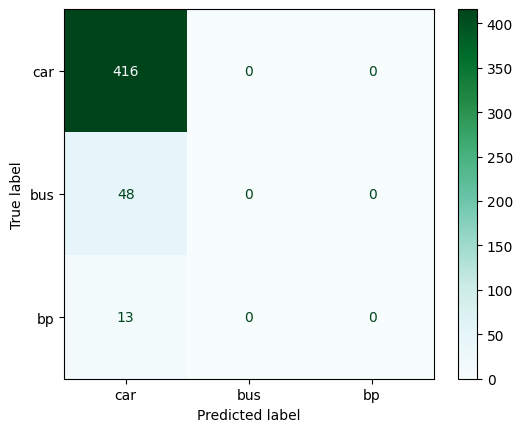

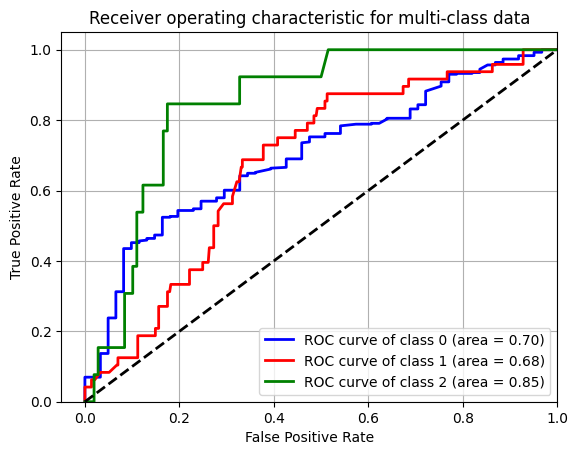

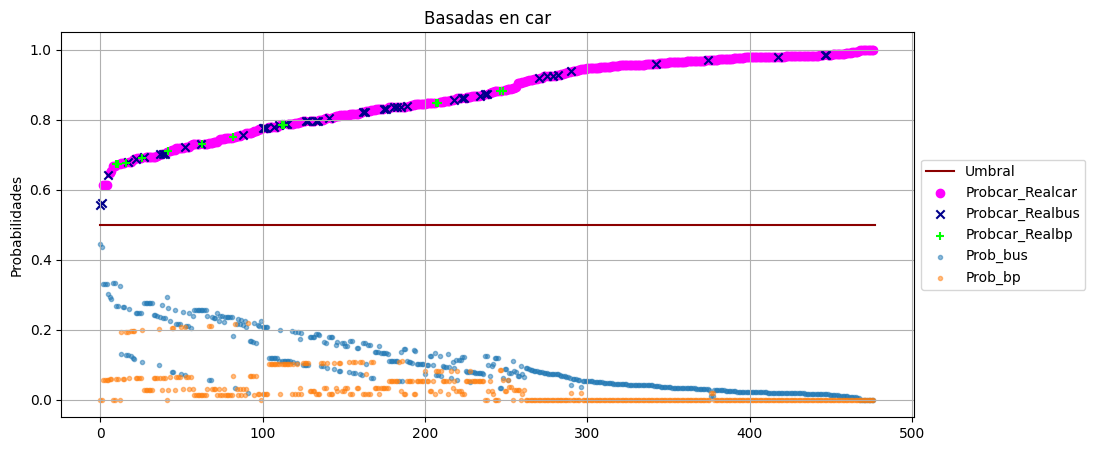

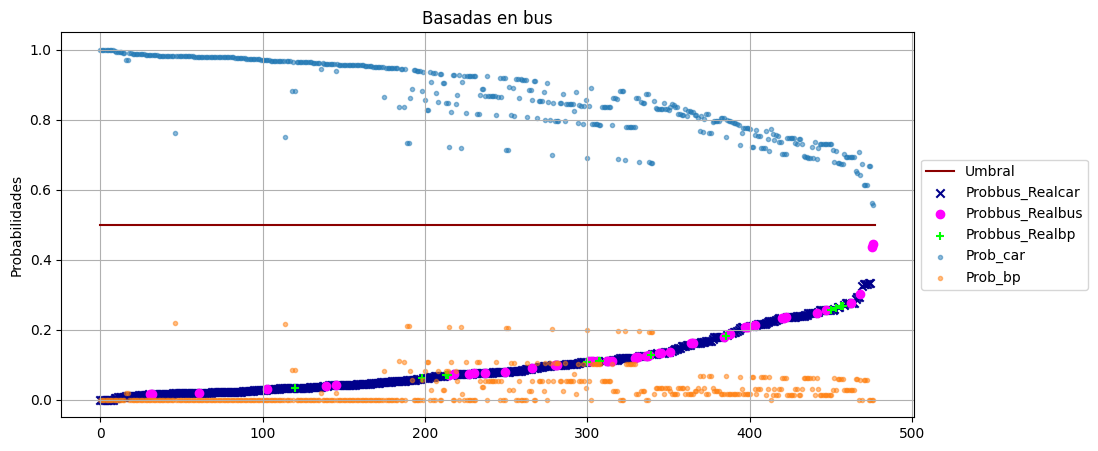

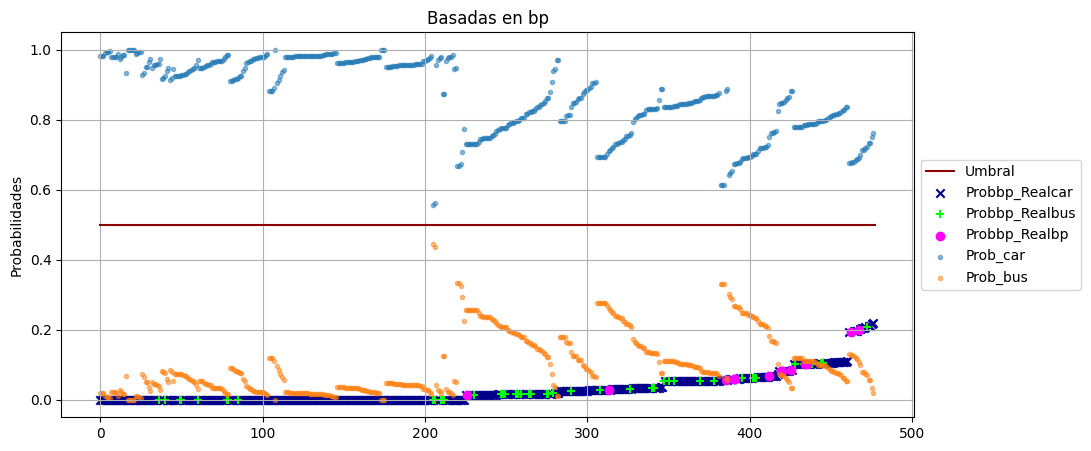

In [108]:
Display_Preds = Logit_model_pred(pandasResults, V, df_test, ['car', 'bus', 'bp'])
Display_Preds.probs_pred_MNL()
Display_Preds.probs
Display_Preds.classification_report()
Display_Preds.confusion_matrix_display()
Display_Preds.ROC_curve()
# # Display_Preds.Precision_Recall_curve()
Display_Preds.Comparative_plot(0)
Display_Preds.Comparative_plot(1)
Display_Preds.Comparative_plot(2)

### Modelo 3

In [109]:
bal_df=pd.read_excel("/content/gdrive/MyDrive/TFM/Script/df_balanced.xlsx")
bal_df=bal_df.iloc[:,1:] #Eliminar primera columna inncesaria
bal_df.head().T

0      1      2      3      4
SEXO_m                           1.00   1.00   1.00   1.00   1.00
ESTUDIOS_primaria_terminada      0.00   0.00   0.00   0.00   1.00
ESTUDIOS_secundaria_terminada    1.00   0.00   0.00   0.00   0.00
ESTUDIOS_formacion_profesional   0.00   0.00   1.00   1.00   0.00
ESTUDIOS_univers_terminada       0.00   0.00   0.00   0.00   0.00
ESTUDIOS_posgrado                0.00   0.00   0.00   0.00   0.00
VIAJE_OBLIGADO_si                0.00   1.00   0.00   0.00   1.00
MOTIVO_hbo                       1.00   0.00   1.00   1.00   0.00
MOTIVO_hbws                      0.00   1.00   0.00   0.00   1.00
EDAD                            45.00  60.00  43.00  43.00  46.00
DIST_KM                          4.84   3.75   1.39   1.39   3.43
TIEMPO_CAR                      14.63  17.00  12.42  13.85  13.15
COSTE_CAR                        4.25   3.86   3.01   3.01   3.74
TIEMPO_BUS                      26.25  24.45  17.89  17.60  23.11
COSTE_BUS                        2.05   1.82   1.30   1.30   1.75
TIEMPO_BP                       25.30  20.76  10.86  10.86  19.40
COSTE_BP                         0.07   0.05   0.02   0.02   0.05
CAR                              1.00   1.00   1.00   1.00   1.00
BUS                              1.00   1.00   1.00   1.00   1.00
BP                               1.00   1.00   1.00   1.00   1.00
custom_id                        1.00   2.00   3.00   4.00   5.00
CHOICE                           1.00   0.00   1.00   1.00   1.00

In [110]:
# Crear df data con variables a utilizar en el modelo Biogeme
data=bal_df.copy()

In [111]:
#Crear el Database de Biogeme a partir del df
database = db.Database('Modelo 3', data)

# The following statement allows you to use the names of the
# variable as Python variable.
globals().update(database.variables)

# Removing some observations
#exclude = No se eliminarán observaciones
#database.remove(exclude)

# Parameters to be estimated
# Arguments:
#   1  Name for report. Typically, the same as the variable
#   2  Starting value
#   3  Lower bound
#   4  Upper bound
#   5  0: estimate the parameter, 1: keep it fixed

ASC_CAR = Beta('ASC_CAR', 0, None, None, 0)
ASC_BUS = Beta('ASC_BUS', 0, None, None, 0)
ASC_BP = Beta('ASC_BP', 0, None, None, 0)
B_TIME_CAR = Beta('B_TIME_CAR', 0, None, None, 0)
B_COST_CAR = Beta('B_COST_CAR', 0, None, None, 0)
B_TIME_BUS = Beta('B_TIME_BUS', 0, None, None, 0)
B_COST_BUS = Beta('B_COST_BUS', 0, None, None, 0)
B_TIME_BP = Beta('B_TIME_BP', 0, None, None, 0)
B_COST_BP = Beta('B_COST_BP', 0, None, None, 0)

B_EDAD_CAR = Beta('B_EDAD_CAR', 0, None, None, 0)
B_EDAD_BUS = Beta('B_EDAD_BUS', 0, None, None, 0)
B_EDAD_BP = Beta('B_EDAD_BP', 0, None, None, 0)
B_SEXO_m_CAR = Beta('B_SEXO_m_CAR', 0, None, None, 0)
B_SEXO_m_BUS = Beta('B_SEXO_m_BUS', 0, None, None, 0)
B_SEXO_m_BP = Beta('B_SEXO_m_BP', 0, None, None, 0)
B_DIST_CAR = Beta('B_DIST_CAR', 0, None, None, 0)
B_DIST_BUS = Beta('B_DIST_BUS', 0, None, None, 0)
B_DIST_BP = Beta('B_DIST_BP', 0, None, None, 0)
B_MOTIVO_hbo_CAR = Beta('B_MOTIVO_hbo_CAR', 0, None, None, 0)
B_MOTIVO_hbo_BUS = Beta('B_MOTIVO_hbo_BUS', 0, None, None, 0)
B_MOTIVO_hbo_BP = Beta('B_MOTIVO_hbo_BP', 0, None, None, 0)
B_MOTIVO_hbws_CAR = Beta('B_MOTIVO_hbws_CAR', 0, None, None, 0)
B_MOTIVO_hbws_BUS = Beta('B_MOTIVO_hbws_BUS', 0, None, None, 0)
B_MOTIVO_hbws_BP = Beta('B_MOTIVO_hbws_BP', 0, None, None, 0)
B_ESTUDIOS_pri_termi_CAR = Beta('B_ESTUDIOS_pri_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_pri_termi_BUS = Beta('B_ESTUDIOS_pri_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_pri_termi_BP = Beta('B_ESTUDIOS_pri_termi_BP', 0, None, None, 0)
B_ESTUDIOS_sec_termi_CAR = Beta('B_ESTUDIOS_sec_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_sec_termi_BUS = Beta('B_ESTUDIOS_sec_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_sec_termi_BP = Beta('B_ESTUDIOS_sec_termi_BP', 0, None, None, 0)
B_ESTUDIOS_forma_pro_CAR = Beta('B_ESTUDIOS_forma_pro_CAR', 0, None, None, 0)
B_ESTUDIOS_forma_pro_BUS = Beta('B_ESTUDIOS_forma_pro_BUS', 0, None, None, 0)
B_ESTUDIOS_forma_pro_BP = Beta('B_ESTUDIOS_forma_pro_BP', 0, None, None, 0)
B_ESTUDIOS_uni_termi_CAR = Beta('B_ESTUDIOS_uni_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_uni_termi_BUS = Beta('B_ESTUDIOS_uni_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_uni_termi_BP = Beta('B_ESTUDIOS_uni_termi_BP', 0, None, None, 0)
B_ESTUDIOS_posgrado_CAR = Beta('B_ESTUDIOS_posgrado_CAR', 0, None, None, 0)
B_ESTUDIOS_posgrado_BUS = Beta('B_ESTUDIOS_posgrado_BUS', 0, None, None, 0)
B_ESTUDIOS_posgrado_BP = Beta('B_ESTUDIOS_posgrado_BP', 0, None, None, 0)
B_VIAJE_OBLI_si_CAR = Beta('B_VIAJE_OBLI_si_CAR', 0, None, None, 0)
B_VIAJE_OBLI_si_BUS = Beta('B_VIAJE_OBLI_si_BUS', 0, None, None, 0)
B_VIAJE_OBLI_si_BP = Beta('B_VIAJE_OBLI_si_BP', 0, None, None, 0)
...

# Definition of the utility functions
CAR = ASC_CAR + B_COST_CAR*COSTE_CAR + B_TIME_CAR*TIEMPO_CAR + \
B_EDAD_CAR*EDAD + B_SEXO_m_CAR*SEXO_m + B_DIST_CAR*DIST_KM + \
B_MOTIVO_hbo_CAR*MOTIVO_hbo + B_MOTIVO_hbws_CAR*MOTIVO_hbws + \
B_ESTUDIOS_pri_termi_CAR*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_CAR*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_CAR*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_CAR*ESTUDIOS_univers_terminada + \
B_ESTUDIOS_posgrado_CAR*ESTUDIOS_posgrado + \
B_VIAJE_OBLI_si_CAR*VIAJE_OBLIGADO_si

BUS = ASC_BUS + B_COST_BUS*COSTE_BUS + B_TIME_BUS*TIEMPO_BUS + \
B_EDAD_BUS*EDAD + B_SEXO_m_BUS*SEXO_m + B_DIST_BUS*DIST_KM + \
B_MOTIVO_hbo_BUS*MOTIVO_hbo + B_MOTIVO_hbws_BUS*MOTIVO_hbws + \
B_ESTUDIOS_pri_termi_BUS*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_BUS*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_BUS*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_BUS*ESTUDIOS_univers_terminada + \
B_ESTUDIOS_posgrado_BUS*ESTUDIOS_posgrado + \
B_VIAJE_OBLI_si_BUS*VIAJE_OBLIGADO_si

BP = ASC_BP + B_COST_BP*COSTE_BP + B_TIME_BP*TIEMPO_BP + \
B_EDAD_BP*EDAD + B_SEXO_m_BP*SEXO_m + B_DIST_BP*DIST_KM + \
B_MOTIVO_hbo_BP*MOTIVO_hbo + B_MOTIVO_hbws_BP*MOTIVO_hbws + \
B_ESTUDIOS_pri_termi_BP*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_BP*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_BP*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_BP*ESTUDIOS_univers_terminada + \
B_ESTUDIOS_posgrado_BP*ESTUDIOS_posgrado + \
B_VIAJE_OBLI_si_BP*VIAJE_OBLIGADO_si

# Associate utility functions with the numbering of alternatives
V = {0: CAR, 1: BUS, 2: BP}

# The choice model is a logit, without availability conditions
logprob = models.loglogit(V, None, CHOICE)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = "MODELO 3"

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults.round(4))

                            Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_BP                     6.8707        9.8807       0.6954        0.4868
ASC_BUS                   10.2635        0.8983      11.4253        0.0000
ASC_CAR                  -17.1342        9.0625      -1.8907        0.0587
B_COST_BP                 29.4032       18.5084       1.5886        0.1121
B_COST_BUS                49.9940       16.3673       3.0545        0.0023
B_COST_CAR                29.8093        9.8026       3.0410        0.0024
B_DIST_BP                 -2.2039        0.8146      -2.7056        0.0068
B_DIST_BUS                 1.1407        0.4069       2.8033        0.0051
B_DIST_CAR                 1.0633        0.4085       2.6031        0.0092
B_EDAD_BP                  0.0013        0.0032       0.4162        0.6772
B_EDAD_BUS                -0.0098        0.0026      -3.8070        0.0001
B_EDAD_CAR                 0.0085        0.0029       2.8963        0.0038
B_ESTUDIOS_forma_pro_BP  

              precision    recall  f1-score   support

         car       0.97      0.50      0.66       416
         bus       0.20      0.54      0.29        48
          bp       0.07      0.69      0.13        13

    accuracy                           0.51       477
   macro avg       0.41      0.58      0.36       477
weighted avg       0.87      0.51      0.61       477



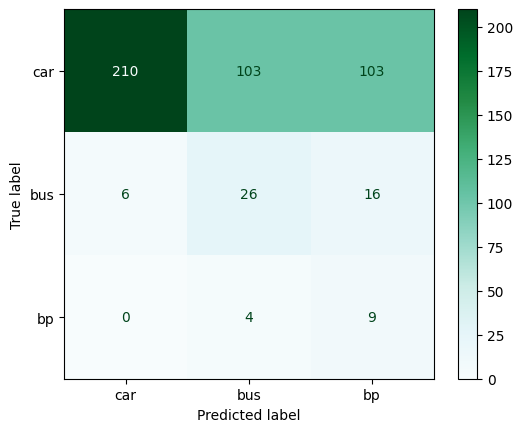

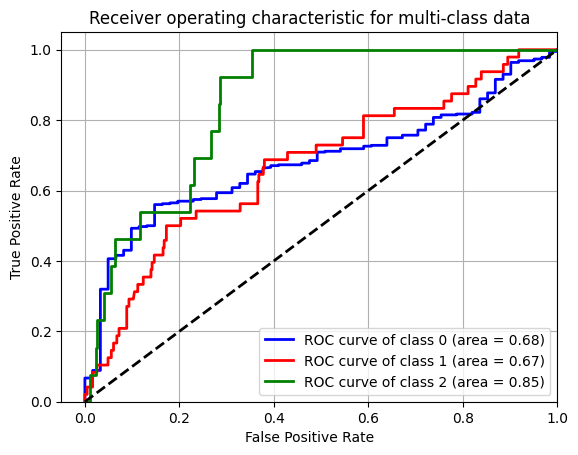

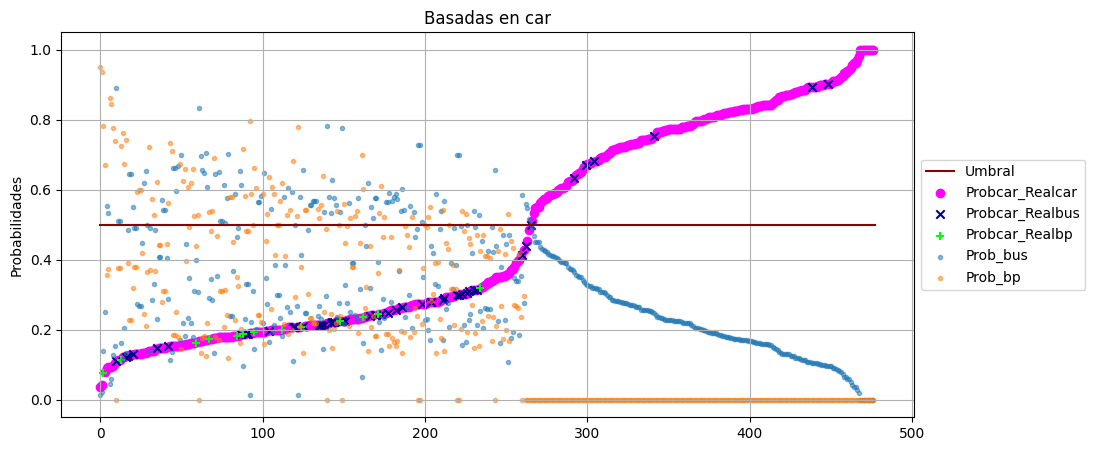

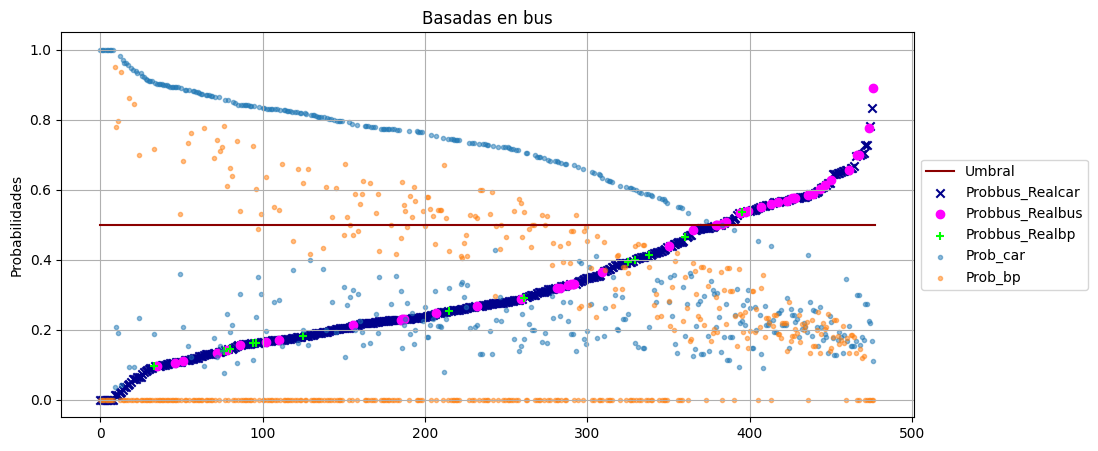

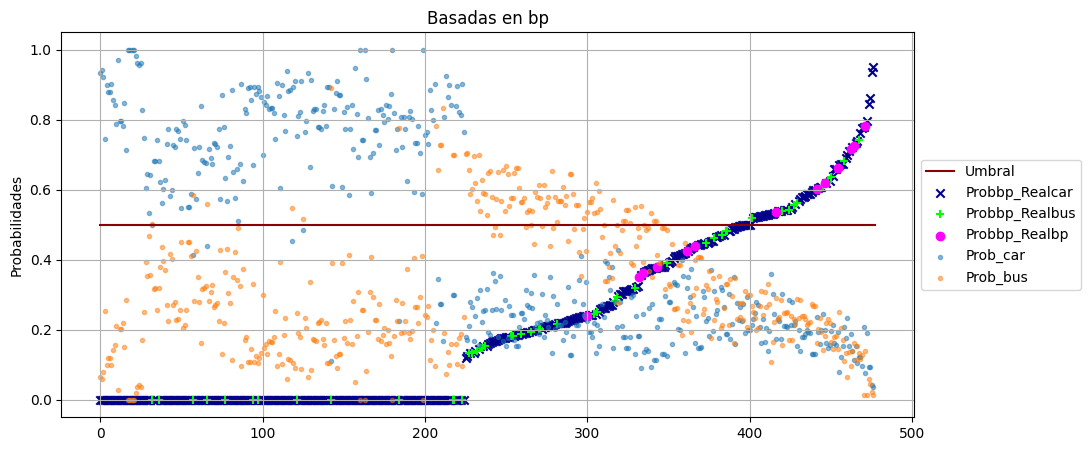

In [112]:
Display_Preds = Logit_model_pred(pandasResults, V, df_test, ['car', 'bus', 'bp'])
Display_Preds.probs_pred_MNL()
Display_Preds.probs
Display_Preds.classification_report()
Display_Preds.confusion_matrix_display()
Display_Preds.ROC_curve()
# # Display_Preds.Precision_Recall_curve()
Display_Preds.Comparative_plot(0)
Display_Preds.Comparative_plot(1)
Display_Preds.Comparative_plot(2)

### Modelo 4

In [113]:
#Crear el Database de Biogeme a partir del df
database = db.Database('Modelo 4', data)

# The following statement allows you to use the names of the
# variable as Python variable.
globals().update(database.variables)

# Removing some observations
#exclude = No se eliminarán observaciones
#database.remove(exclude)

# Parameters to be estimated
# Arguments:
#   1  Name for report. Typically, the same as the variable
#   2  Starting value
#   3  Lower bound
#   4  Upper bound
#   5  0: estimate the parameter, 1: keep it fixed

#ASC_CAR = Beta('ASC_CAR', 0, None, None, 0)
ASC_BUS = Beta('ASC_BUS', 0, None, None, 0)
#ASC_BP = Beta('ASC_BP', 0, None, None, 0)
B_TIME_CAR = Beta('B_TIME_CAR', 0, None, None, 0)
B_COST_CAR = Beta('B_COST_CAR', 0, None, None, 0)
B_TIME_BUS = Beta('B_TIME_BUS', 0, None, None, 0)
B_COST_BUS = Beta('B_COST_BUS', 0, None, None, 0)
B_TIME_BP = Beta('B_TIME_BP', 0, None, None, 0)
#B_COST_BP = Beta('B_COST_BP', 0, None, None, 0)

#B_EDAD_CAR = Beta('B_EDAD_CAR', 0, None, None, 0)
B_EDAD_BUS = Beta('B_EDAD_BUS', 0, None, None, 0)
B_EDAD_BP = Beta('B_EDAD_BP', 0, None, None, 0)
B_SEXO_m_CAR = Beta('B_SEXO_m_CAR', 0, None, None, 0)
#B_SEXO_m_BUS = Beta('B_SEXO_m_BUS', 0, None, None, 0)
#B_SEXO_m_BP = Beta('B_SEXO_m_BP', 0, None, None, 0)
B_DIST_CAR = Beta('B_DIST_CAR', 0, None, None, 0)
B_DIST_BUS = Beta('B_DIST_BUS', 0, None, None, 0)
B_DIST_BP = Beta('B_DIST_BP', 0, None, None, 0)
B_MOTIVO_hbo_CAR = Beta('B_MOTIVO_hbo_CAR', 0, None, None, 0)
B_MOTIVO_hbo_BUS = Beta('B_MOTIVO_hbo_BUS', 0, None, None, 0)
B_MOTIVO_hbo_BP = Beta('B_MOTIVO_hbo_BP', 0, None, None, 0)
B_MOTIVO_hbws_CAR = Beta('B_MOTIVO_hbws_CAR', 0, None, None, 0)
#B_MOTIVO_hbws_BUS = Beta('B_MOTIVO_hbws_BUS', 0, None, None, 0)
B_MOTIVO_hbws_BP = Beta('B_MOTIVO_hbws_BP', 0, None, None, 0)
B_ESTUDIOS_pri_termi_CAR = Beta('B_ESTUDIOS_pri_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_pri_termi_BUS = Beta('B_ESTUDIOS_pri_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_pri_termi_BP = Beta('B_ESTUDIOS_pri_termi_BP', 0, None, None, 0)
B_ESTUDIOS_sec_termi_CAR = Beta('B_ESTUDIOS_sec_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_sec_termi_BUS = Beta('B_ESTUDIOS_sec_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_sec_termi_BP = Beta('B_ESTUDIOS_sec_termi_BP', 0, None, None, 0)
B_ESTUDIOS_forma_pro_CAR = Beta('B_ESTUDIOS_forma_pro_CAR', 0, None, None, 0)
B_ESTUDIOS_forma_pro_BUS = Beta('B_ESTUDIOS_forma_pro_BUS', 0, None, None, 0)
B_ESTUDIOS_forma_pro_BP = Beta('B_ESTUDIOS_forma_pro_BP', 0, None, None, 0)
B_ESTUDIOS_uni_termi_CAR = Beta('B_ESTUDIOS_uni_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_uni_termi_BUS = Beta('B_ESTUDIOS_uni_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_uni_termi_BP = Beta('B_ESTUDIOS_uni_termi_BP', 0, None, None, 0)
B_ESTUDIOS_posgrado_CAR = Beta('B_ESTUDIOS_posgrado_CAR', 0, None, None, 0)
B_ESTUDIOS_posgrado_BUS = Beta('B_ESTUDIOS_posgrado_BUS', 0, None, None, 0)
#B_ESTUDIOS_posgrado_BP = Beta('B_ESTUDIOS_posgrado_BP', 0, None, None, 0)
B_VIAJE_OBLI_si_CAR = Beta('B_VIAJE_OBLI_si_CAR', 0, None, None, 0)
B_VIAJE_OBLI_si_BUS = Beta('B_VIAJE_OBLI_si_BUS', 0, None, None, 0)
B_VIAJE_OBLI_si_BP = Beta('B_VIAJE_OBLI_si_BP', 0, None, None, 0)
...

# Definition of the utility functions
CAR = ASC_CAR + B_COST_CAR*COSTE_CAR + B_TIME_CAR*TIEMPO_CAR + \
                    B_SEXO_m_CAR*SEXO_m + B_DIST_CAR*DIST_KM + \
B_MOTIVO_hbo_CAR*MOTIVO_hbo + B_MOTIVO_hbws_CAR*MOTIVO_hbws + \
B_ESTUDIOS_pri_termi_CAR*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_CAR*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_CAR*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_CAR*ESTUDIOS_univers_terminada + \
B_ESTUDIOS_posgrado_CAR*ESTUDIOS_posgrado + \
B_VIAJE_OBLI_si_CAR*VIAJE_OBLIGADO_si

BUS =         B_COST_BUS*COSTE_BUS + B_TIME_BUS*TIEMPO_BUS + \
B_EDAD_BUS*EDAD +                       B_DIST_BUS*DIST_KM + \
B_MOTIVO_hbo_BUS*MOTIVO_hbo                                + \
B_ESTUDIOS_pri_termi_BUS*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_BUS*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_BUS*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_BUS*ESTUDIOS_univers_terminada + \
B_ESTUDIOS_posgrado_BUS*ESTUDIOS_posgrado + \
B_VIAJE_OBLI_si_BUS*VIAJE_OBLIGADO_si

BP =                               B_TIME_BP*TIEMPO_BP + \
                B_SEXO_m_BP*SEXO_m + B_DIST_BP*DIST_KM + \
B_MOTIVO_hbo_BP*MOTIVO_hbo + B_MOTIVO_hbws_BP*MOTIVO_hbws + \
B_ESTUDIOS_pri_termi_BP*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_BP*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_BP*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_BP*ESTUDIOS_univers_terminada + \
B_VIAJE_OBLI_si_BP*VIAJE_OBLIGADO_si

# Associate utility functions with the numbering of alternatives
V = {0: CAR, 1: BUS, 2: BP}

# The choice model is a logit, without availability conditions
logprob = models.loglogit(V, None, CHOICE)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = "MODELO 4"

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults.round(4))

                            Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_CAR                  -26.3419        4.8929      -5.3837        0.0000
B_COST_BUS                48.2607        9.5838       5.0356        0.0000
B_COST_CAR                28.7752        5.7292       5.0226        0.0000
B_DIST_BP                 -2.2168        0.4756      -4.6615        0.0000
B_DIST_BUS                 1.1466        0.2377       4.8231        0.0000
B_DIST_CAR                 1.0702        0.2391       4.4750        0.0000
B_EDAD_BUS                -0.0152        0.0038      -4.0091        0.0001
B_ESTUDIOS_forma_pro_BP    6.0672        1.1754       5.1617        0.0000
B_ESTUDIOS_forma_pro_BUS  -3.5976        0.6225      -5.7797        0.0000
B_ESTUDIOS_forma_pro_CAR  -2.4696        0.5944      -4.1547        0.0000
B_ESTUDIOS_posgrado_BUS   -9.2310        1.7490      -5.2778        0.0000
B_ESTUDIOS_posgrado_CAR    2.5808        1.7529       1.4723        0.1409
B_ESTUDIOS_pri_termi_BP  

              precision    recall  f1-score   support

         car       0.97      0.50      0.66       416
         bus       0.19      0.52      0.28        48
          bp       0.08      0.77      0.14        13

    accuracy                           0.51       477
   macro avg       0.41      0.60      0.36       477
weighted avg       0.87      0.51      0.61       477



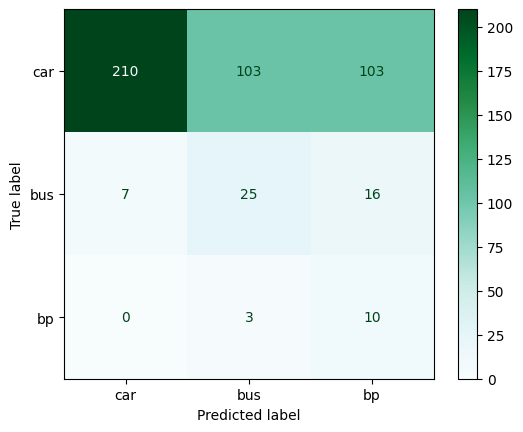

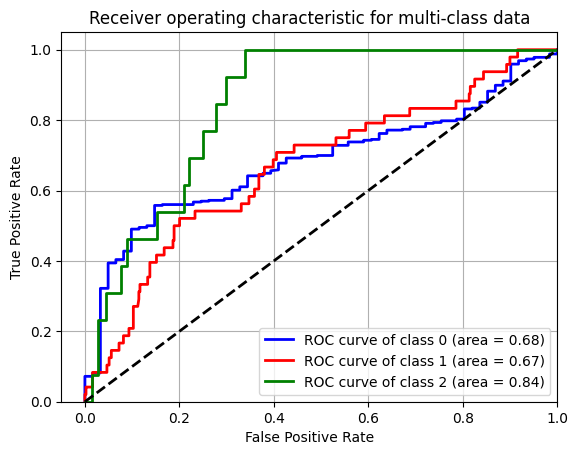

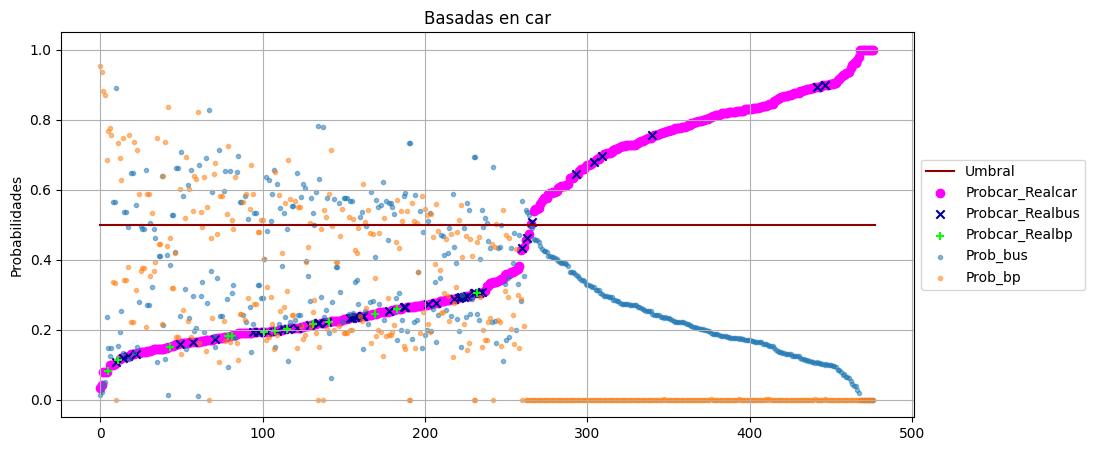

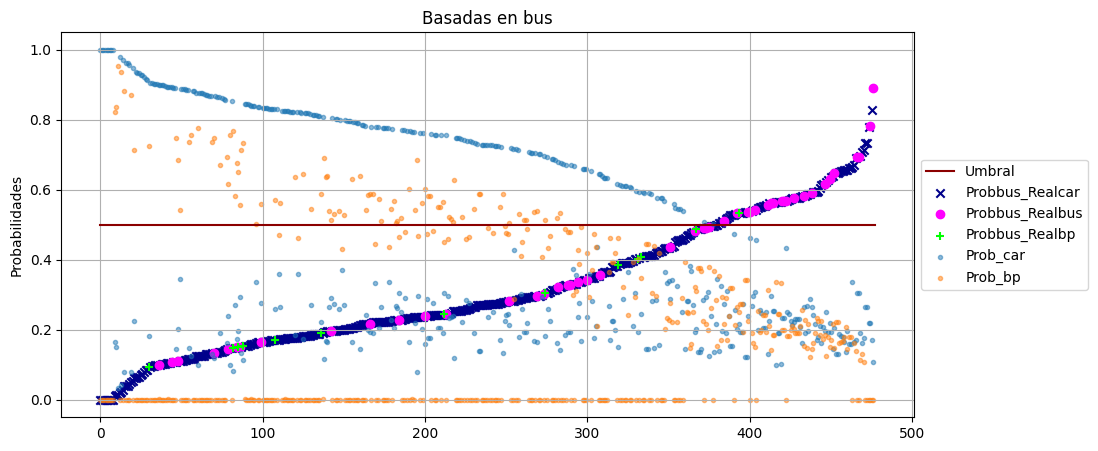

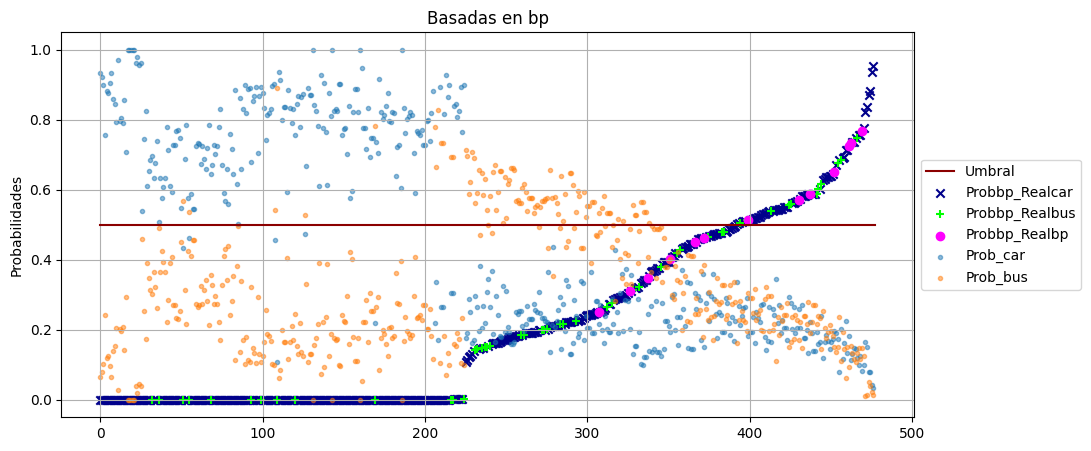

In [114]:
Display_Preds = Logit_model_pred(pandasResults, V, df_test, ['car', 'bus', 'bp'])
Display_Preds.probs_pred_MNL()
Display_Preds.probs
Display_Preds.classification_report()
Display_Preds.confusion_matrix_display()
Display_Preds.ROC_curve()
# # Display_Preds.Precision_Recall_curve()
Display_Preds.Comparative_plot(0)
Display_Preds.Comparative_plot(1)
Display_Preds.Comparative_plot(2)

## Modelo 5.1 (cuadrados)

In [115]:
cont = ['EDAD', 'DIST_KM', 'TIEMPO_CAR','COSTE_CAR', 'TIEMPO_BUS', 'COSTE_BUS', 'TIEMPO_BP', 'COSTE_BP']
cat_dep = ['SEXO_m', 'ESTUDIOS_primaria_terminada', 'ESTUDIOS_secundaria_terminada', 'ESTUDIOS_formacion_profesional',
            'ESTUDIOS_univers_terminada', 'ESTUDIOS_posgrado', 'VIAJE_OBLIGADO_si','MOTIVO_hbo', 'MOTIVO_hbws', "CHOICE"]

data_cuad = pd.merge(data[cont]**2, data[cat_dep], left_index=True, right_index=True)
df_test_cuad = pd.merge(df_test[cont]**2, df_test[cat_dep], left_index=True, right_index=True)

In [116]:
#Crear el Database de Biogeme a partir del df
database = db.Database('Modelo 5.1 cuadrados', data_cuad)

# The following statement allows you to use the names of the
# variable as Python variable.
globals().update(database.variables)

# Parameters to be estimated
# Arguments:
#   1  Name for report. Typically, the same as the variable
#   2  Starting value
#   3  Lower bound
#   4  Upper bound
#   5  0: estimate the parameter, 1: keep it fixed

ASC_CAR = Beta('ASC_CAR', 0, None, None, 0)
ASC_BUS = Beta('ASC_BUS', 0, None, None, 0)
ASC_BP = Beta('ASC_BP', 0, None, None, 0)
B_TIME_CAR = Beta('B_TIME_CAR', 0, None, None, 0)
B_COST_CAR = Beta('B_COST_CAR', 0, None, None, 0)
#B_TIME_BUS = Beta('B_TIME_BUS', 0, None, None, 0)
B_COST_BUS = Beta('B_COST_BUS', 0, None, None, 0)
B_TIME_BP = Beta('B_TIME_BP', 0, None, None, 0)
B_COST_BP = Beta('B_COST_BP', 0, None, None, 0)

#B_EDAD_CAR = Beta('B_EDAD_CAR', 0, None, None, 0)
B_EDAD_BUS = Beta('B_EDAD_BUS', 0, None, None, 0)
#B_EDAD_BP = Beta('B_EDAD_BP', 0, None, None, 0)
B_SEXO_m_CAR = Beta('B_SEXO_m_CAR', 0, None, None, 0)
B_SEXO_m_BUS = Beta('B_SEXO_m_BUS', 0, None, None, 0)
B_SEXO_m_BP = Beta('B_SEXO_m_BP', 0, None, None, 0)
B_DIST_CAR = Beta('B_DIST_CAR', 0, None, None, 0)
B_DIST_BUS = Beta('B_DIST_BUS', 0, None, None, 0)
B_DIST_BP = Beta('B_DIST_BP', 0, None, None, 0)
B_MOTIVO_hbo_CAR = Beta('B_MOTIVO_hbo_CAR', 0, None, None, 0)
B_MOTIVO_hbo_BUS = Beta('B_MOTIVO_hbo_BUS', 0, None, None, 0)
B_MOTIVO_hbo_BP = Beta('B_MOTIVO_hbo_BP', 0, None, None, 0)
B_MOTIVO_hbws_CAR = Beta('B_MOTIVO_hbws_CAR', 0, None, None, 0)
B_MOTIVO_hbws_BUS = Beta('B_MOTIVO_hbws_BUS', 0, None, None, 0)
B_MOTIVO_hbws_BP = Beta('B_MOTIVO_hbws_BP', 0, None, None, 0)
B_ESTUDIOS_pri_termi_CAR = Beta('B_ESTUDIOS_pri_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_pri_termi_BUS = Beta('B_ESTUDIOS_pri_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_pri_termi_BP = Beta('B_ESTUDIOS_pri_termi_BP', 0, None, None, 0)
B_ESTUDIOS_sec_termi_CAR = Beta('B_ESTUDIOS_sec_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_sec_termi_BUS = Beta('B_ESTUDIOS_sec_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_sec_termi_BP = Beta('B_ESTUDIOS_sec_termi_BP', 0, None, None, 0)
B_ESTUDIOS_forma_pro_CAR = Beta('B_ESTUDIOS_forma_pro_CAR', 0, None, None, 0)
B_ESTUDIOS_forma_pro_BUS = Beta('B_ESTUDIOS_forma_pro_BUS', 0, None, None, 0)
B_ESTUDIOS_forma_pro_BP = Beta('B_ESTUDIOS_forma_pro_BP', 0, None, None, 0)
B_ESTUDIOS_uni_termi_CAR = Beta('B_ESTUDIOS_uni_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_uni_termi_BUS = Beta('B_ESTUDIOS_uni_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_uni_termi_BP = Beta('B_ESTUDIOS_uni_termi_BP', 0, None, None, 0)
B_ESTUDIOS_posgrado_CAR = Beta('B_ESTUDIOS_posgrado_CAR', 0, None, None, 0)
B_ESTUDIOS_posgrado_BUS = Beta('B_ESTUDIOS_posgrado_BUS', 0, None, None, 0)
B_ESTUDIOS_posgrado_BP = Beta('B_ESTUDIOS_posgrado_BP', 0, None, None, 0)
B_VIAJE_OBLI_si_CAR = Beta('B_VIAJE_OBLI_si_CAR', 0, None, None, 0)
B_VIAJE_OBLI_si_BUS = Beta('B_VIAJE_OBLI_si_BUS', 0, None, None, 0)
B_VIAJE_OBLI_si_BP = Beta('B_VIAJE_OBLI_si_BP', 0, None, None, 0)
...

# Definition of the utility functions
CAR = ASC_CAR + B_COST_CAR*COSTE_CAR + B_TIME_CAR*TIEMPO_CAR + \
                    B_SEXO_m_CAR*SEXO_m + B_DIST_CAR*DIST_KM + \
B_MOTIVO_hbo_CAR*MOTIVO_hbo + B_MOTIVO_hbws_CAR*MOTIVO_hbws + \
B_ESTUDIOS_pri_termi_CAR*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_CAR*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_CAR*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_CAR*ESTUDIOS_univers_terminada + \
B_ESTUDIOS_posgrado_CAR*ESTUDIOS_posgrado + \
B_VIAJE_OBLI_si_CAR*VIAJE_OBLIGADO_si

BUS = ASC_BUS + B_COST_BUS*COSTE_BUS                       + \
B_EDAD_BUS*EDAD + B_SEXO_m_BUS*SEXO_m + B_DIST_BUS*DIST_KM + \
B_MOTIVO_hbo_BUS*MOTIVO_hbo + B_MOTIVO_hbws_BUS*MOTIVO_hbws + \
B_ESTUDIOS_pri_termi_BUS*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_BUS*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_BUS*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_BUS*ESTUDIOS_univers_terminada + \
B_ESTUDIOS_posgrado_BUS*ESTUDIOS_posgrado + \
B_VIAJE_OBLI_si_BUS*VIAJE_OBLIGADO_si

BP = ASC_BP + B_COST_BP*COSTE_BP + B_TIME_BP*TIEMPO_BP + \
                B_SEXO_m_BP*SEXO_m + B_DIST_BP*DIST_KM + \
B_MOTIVO_hbo_BP*MOTIVO_hbo + B_MOTIVO_hbws_BP*MOTIVO_hbws + \
B_ESTUDIOS_pri_termi_BP*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_BP*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_BP*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_BP*ESTUDIOS_univers_terminada + \
B_ESTUDIOS_posgrado_BP*ESTUDIOS_posgrado + \
B_VIAJE_OBLI_si_BP*VIAJE_OBLIGADO_si

# Associate utility functions with the numbering of alternatives
V = {0: CAR, 1: BUS, 2: BP}

# The choice model is a logit, without availability conditions
logprob = models.loglogit(V, None, CHOICE)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = "MODELO 5.1 cuadrados"

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults.round(4))

                             Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_BP                    -26.6778        0.3219     -82.8845        0.0000
ASC_BUS                    13.2296        0.2317      57.1068        0.0000
ASC_CAR                    13.4482        0.3043      44.1939        0.0000
B_COST_BP                 322.5846       71.0285       4.5416        0.0000
B_COST_BUS                 -1.0634        0.1659      -6.4119        0.0000
B_COST_CAR                 -0.2903        0.0473      -6.1365        0.0000
B_DIST_BP                   0.0275        0.0050       5.5393        0.0000
B_DIST_BUS                 -0.0103        0.0018      -5.6401        0.0000
B_DIST_CAR                 -0.0172        0.0025      -6.9800        0.0000
B_EDAD_BUS                 -0.0002        0.0000      -5.1552        0.0000
B_ESTUDIOS_forma_pro_BP     6.7387        0.1394      48.3302        0.0000
B_ESTUDIOS_forma_pro_BUS   -3.9298        0.1285     -30.5838        0.0000
B_ESTUDIOS_f

              precision    recall  f1-score   support

         car       0.96      0.52      0.67       416
         bus       0.16      0.44      0.23        48
          bp       0.09      0.85      0.17        13

    accuracy                           0.52       477
   macro avg       0.40      0.60      0.36       477
weighted avg       0.86      0.52      0.61       477



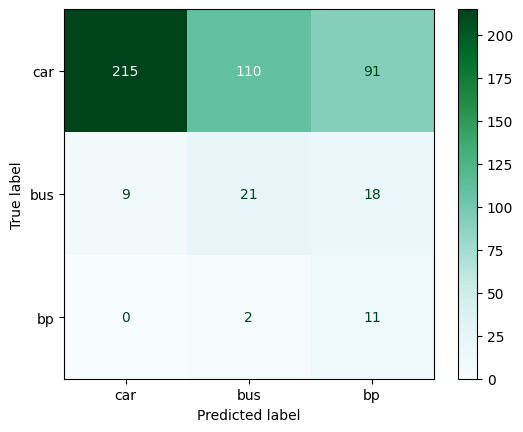

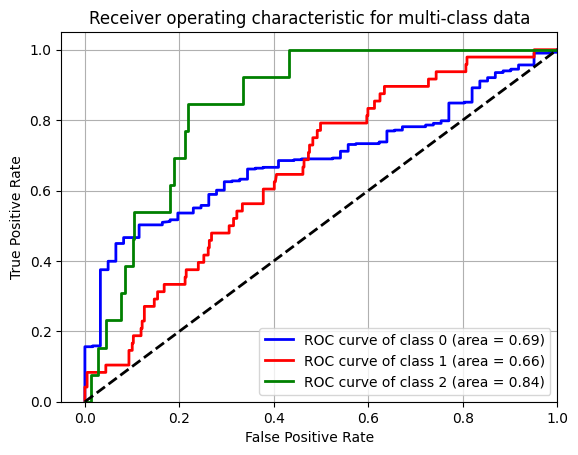

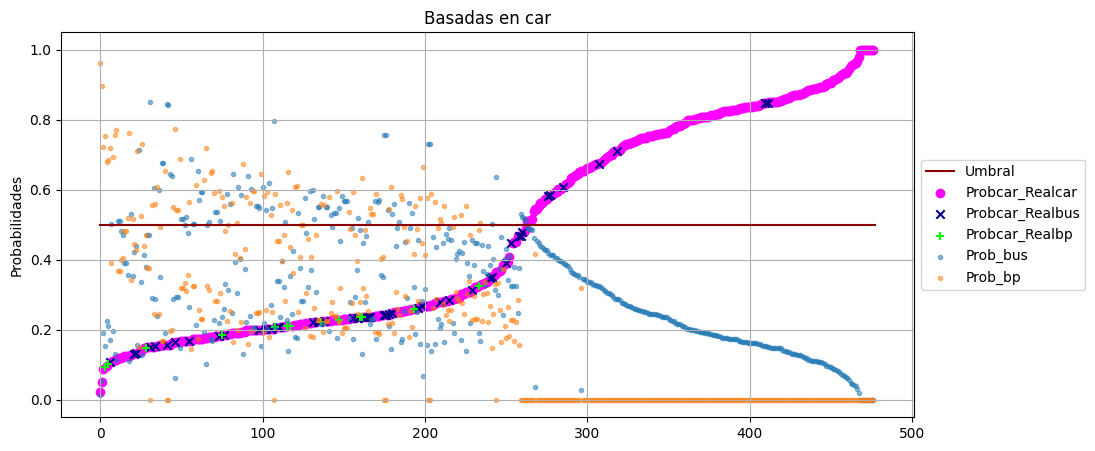

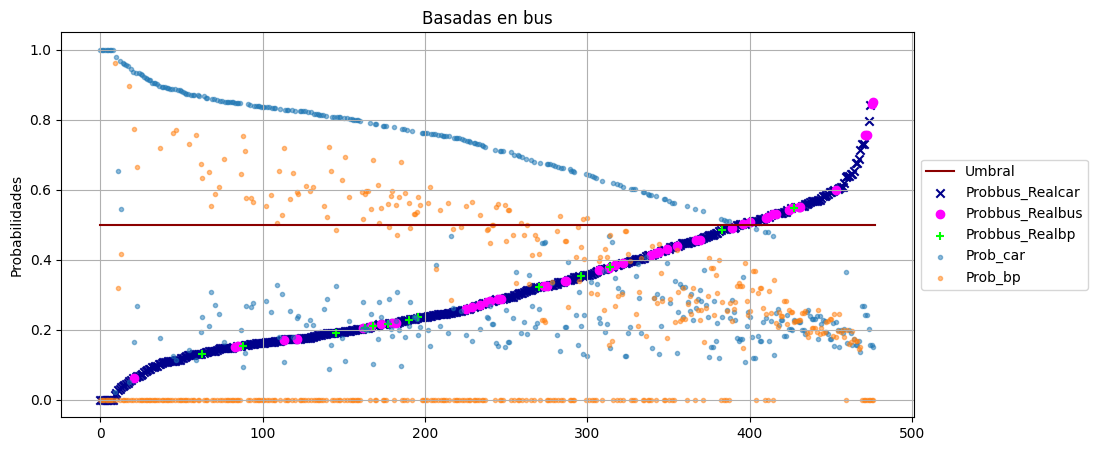

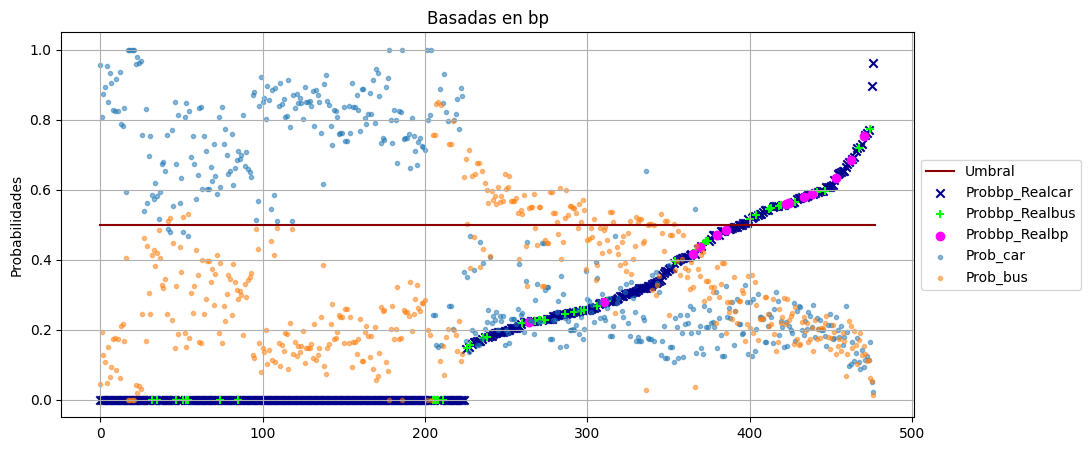

In [117]:
Display_Preds = Logit_model_pred(pandasResults, V, df_test_cuad, ['car', 'bus', 'bp'])
Display_Preds.probs_pred_MNL()
Display_Preds.probs
Display_Preds.classification_report()
Display_Preds.confusion_matrix_display()
Display_Preds.ROC_curve()
# # Display_Preds.Precision_Recall_curve()
Display_Preds.Comparative_plot(0)
Display_Preds.Comparative_plot(1)
Display_Preds.Comparative_plot(2)

## Modelo 5.2 (raices cuadradas)


In [118]:
cont = ['EDAD', 'DIST_KM', 'TIEMPO_CAR','COSTE_CAR', 'TIEMPO_BUS', 'COSTE_BUS', 'TIEMPO_BP', 'COSTE_BP']
cat_dep = ['SEXO_m', 'ESTUDIOS_primaria_terminada', 'ESTUDIOS_secundaria_terminada', 'ESTUDIOS_formacion_profesional',
            'ESTUDIOS_univers_terminada', 'ESTUDIOS_posgrado', 'VIAJE_OBLIGADO_si','MOTIVO_hbo', 'MOTIVO_hbws', "CHOICE"]

data_sr = pd.merge(data[cont]**0.5, data[cat_dep], left_index=True, right_index=True)
df_test_sr = pd.merge(df_test[cont]**0.5, df_test[cat_dep], left_index=True, right_index=True)

In [119]:
#Crear el Database de Biogeme a partir del df
database = db.Database('Modelo 5.2 raices cuadradas', data_sr)

# The following statement allows you to use the names of the
# variable as Python variable.
globals().update(database.variables)

# Removing some observations
#exclude = No se eliminarán observaciones
#database.remove(exclude)

# Parameters to be estimated
# Arguments:
#   1  Name for report. Typically, the same as the variable
#   2  Starting value
#   3  Lower bound
#   4  Upper bound
#   5  0: estimate the parameter, 1: keep it fixed

ASC_CAR = Beta('ASC_CAR', 0, None, None, 0)
ASC_BUS = Beta('ASC_BUS', 0, None, None, 0)
ASC_BP = Beta('ASC_BP', 0, None, None, 0)
B_TIME_CAR = Beta('B_TIME_CAR', 0, None, None, 0)
B_COST_CAR = Beta('B_COST_CAR', 0, None, None, 0)
B_TIME_BUS = Beta('B_TIME_BUS', 0, None, None, 0)
B_COST_BUS = Beta('B_COST_BUS', 0, None, None, 0)
#B_TIME_BP = Beta('B_TIME_BP', 0, None, None, 0)
B_COST_BP = Beta('B_COST_BP', 0, None, None, 0)

B_EDAD_CAR = Beta('B_EDAD_CAR', 0, None, None, 0)
#B_EDAD_BUS = Beta('B_EDAD_BUS', 0, None, None, 0)
#B_EDAD_BP = Beta('B_EDAD_BP', 0, None, None, 0)
B_SEXO_m_CAR = Beta('B_SEXO_m_CAR', 0, None, None, 0)
B_SEXO_m_BUS = Beta('B_SEXO_m_BUS', 0, None, None, 0)
B_SEXO_m_BP = Beta('B_SEXO_m_BP', 0, None, None, 0)
B_DIST_CAR = Beta('B_DIST_CAR', 0, None, None, 0)
#B_DIST_BUS = Beta('B_DIST_BUS', 0, None, None, 0)
#B_DIST_BP = Beta('B_DIST_BP', 0, None, None, 0)
B_MOTIVO_hbo_CAR = Beta('B_MOTIVO_hbo_CAR', 0, None, None, 0)
B_MOTIVO_hbo_BUS = Beta('B_MOTIVO_hbo_BUS', 0, None, None, 0)
B_MOTIVO_hbo_BP = Beta('B_MOTIVO_hbo_BP', 0, None, None, 0)
B_MOTIVO_hbws_CAR = Beta('B_MOTIVO_hbws_CAR', 0, None, None, 0)
B_MOTIVO_hbws_BUS = Beta('B_MOTIVO_hbws_BUS', 0, None, None, 0)
B_MOTIVO_hbws_BP = Beta('B_MOTIVO_hbws_BP', 0, None, None, 0)
B_ESTUDIOS_pri_termi_CAR = Beta('B_ESTUDIOS_pri_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_pri_termi_BUS = Beta('B_ESTUDIOS_pri_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_pri_termi_BP = Beta('B_ESTUDIOS_pri_termi_BP', 0, None, None, 0)
B_ESTUDIOS_sec_termi_CAR = Beta('B_ESTUDIOS_sec_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_sec_termi_BUS = Beta('B_ESTUDIOS_sec_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_sec_termi_BP = Beta('B_ESTUDIOS_sec_termi_BP', 0, None, None, 0)
B_ESTUDIOS_forma_pro_CAR = Beta('B_ESTUDIOS_forma_pro_CAR', 0, None, None, 0)
B_ESTUDIOS_forma_pro_BUS = Beta('B_ESTUDIOS_forma_pro_BUS', 0, None, None, 0)
B_ESTUDIOS_forma_pro_BP = Beta('B_ESTUDIOS_forma_pro_BP', 0, None, None, 0)
B_ESTUDIOS_uni_termi_CAR = Beta('B_ESTUDIOS_uni_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_uni_termi_BUS = Beta('B_ESTUDIOS_uni_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_uni_termi_BP = Beta('B_ESTUDIOS_uni_termi_BP', 0, None, None, 0)
B_ESTUDIOS_posgrado_CAR = Beta('B_ESTUDIOS_posgrado_CAR', 0, None, None, 0)
B_ESTUDIOS_posgrado_BUS = Beta('B_ESTUDIOS_posgrado_BUS', 0, None, None, 0)
#B_ESTUDIOS_posgrado_BP = Beta('B_ESTUDIOS_posgrado_BP', 0, None, None, 0)
B_VIAJE_OBLI_si_CAR = Beta('B_VIAJE_OBLI_si_CAR', 0, None, None, 0)
B_VIAJE_OBLI_si_BUS = Beta('B_VIAJE_OBLI_si_BUS', 0, None, None, 0)
B_VIAJE_OBLI_si_BP = Beta('B_VIAJE_OBLI_si_BP', 0, None, None, 0)
...

# Definition of the utility functions
CAR = ASC_CAR + B_COST_CAR*COSTE_CAR + B_TIME_CAR*TIEMPO_CAR + \
B_EDAD_CAR*EDAD + B_SEXO_m_CAR*SEXO_m + B_DIST_CAR*DIST_KM + \
B_MOTIVO_hbo_CAR*MOTIVO_hbo + B_MOTIVO_hbws_CAR*MOTIVO_hbws + \
B_ESTUDIOS_pri_termi_CAR*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_CAR*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_CAR*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_CAR*ESTUDIOS_univers_terminada + \
B_ESTUDIOS_posgrado_CAR*ESTUDIOS_posgrado + \
B_VIAJE_OBLI_si_CAR*VIAJE_OBLIGADO_si

BUS = ASC_BUS + B_COST_BUS*COSTE_BUS + B_TIME_BUS*TIEMPO_BUS + \
                  B_SEXO_m_BUS*SEXO_m                        + \
B_MOTIVO_hbo_BUS*MOTIVO_hbo + B_MOTIVO_hbws_BUS*MOTIVO_hbws + \
B_ESTUDIOS_pri_termi_BUS*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_BUS*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_BUS*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_BUS*ESTUDIOS_univers_terminada + \
B_ESTUDIOS_posgrado_BUS*ESTUDIOS_posgrado + \
B_VIAJE_OBLI_si_BUS*VIAJE_OBLIGADO_si

BP = ASC_BP + B_COST_BP*COSTE_BP                        + \
B_SEXO_m_BP*SEXO_m                                      + \
B_MOTIVO_hbo_BP*MOTIVO_hbo + B_MOTIVO_hbws_BP*MOTIVO_hbws + \
B_ESTUDIOS_pri_termi_BP*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_BP*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_BP*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_BP*ESTUDIOS_univers_terminada + \
B_VIAJE_OBLI_si_BP*VIAJE_OBLIGADO_si

# Associate utility functions with the numbering of alternatives
V = {0: CAR, 1: BUS, 2: BP}

# The choice model is a logit, without availability conditions
logprob = models.loglogit(V, None, CHOICE)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = "MODELO 5.2 raices cuadradas"

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults.round(4))

                            Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_BP                   -27.3802        0.8364     -32.7348        0.0000
ASC_BUS                   17.0725        0.5496      31.0609        0.0000
ASC_CAR                   10.3078        0.9370      11.0003        0.0000
B_COST_BP                -18.8738        1.8022     -10.4723        0.0000
B_COST_BUS                -6.1937        0.8446      -7.3337        0.0000
B_COST_CAR                -3.6435        0.8514      -4.2794        0.0000
B_DIST_CAR                -1.1648        0.2212      -5.2653        0.0000
B_EDAD_CAR                 0.1997        0.0541       3.6919        0.0002
B_ESTUDIOS_forma_pro_BP    6.9814        0.2112      33.0537        0.0000
B_ESTUDIOS_forma_pro_BUS  -4.1042        0.1931     -21.2496        0.0000
B_ESTUDIOS_forma_pro_CAR  -2.8772        0.2036     -14.1300        0.0000
B_ESTUDIOS_posgrado_BUS   -9.0339        0.3639     -24.8262        0.0000
B_ESTUDIOS_posgrado_CAR  

              precision    recall  f1-score   support

         car       0.97      0.50      0.66       416
         bus       0.21      0.58      0.31        48
          bp       0.08      0.77      0.14        13

    accuracy                           0.51       477
   macro avg       0.42      0.62      0.37       477
weighted avg       0.87      0.51      0.61       477



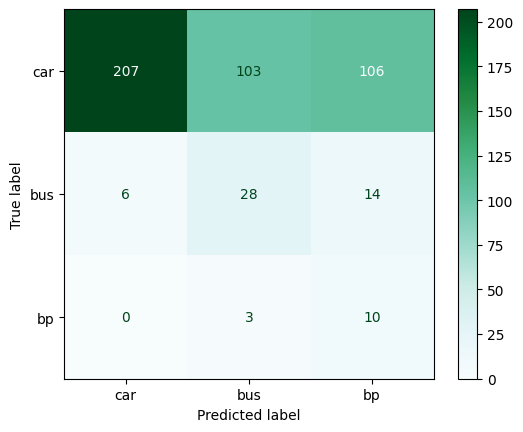

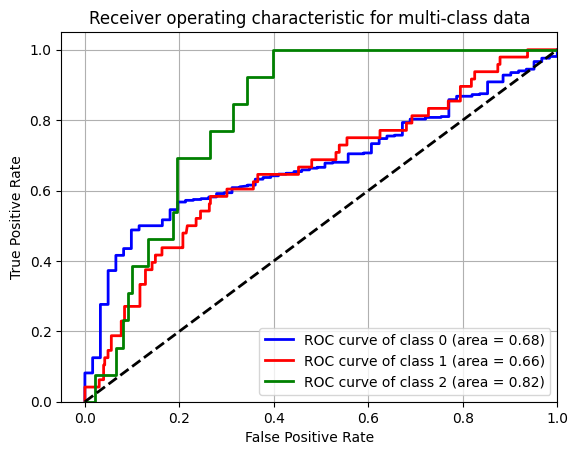

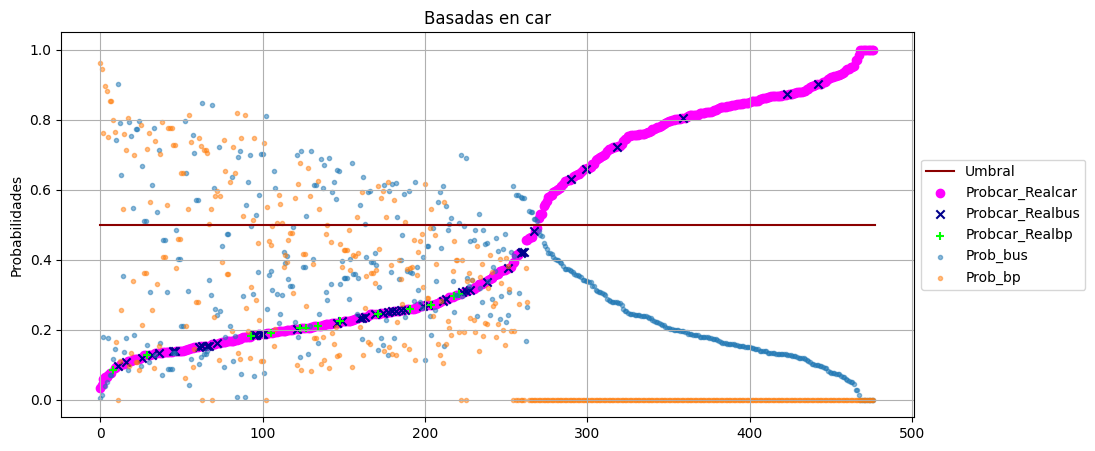

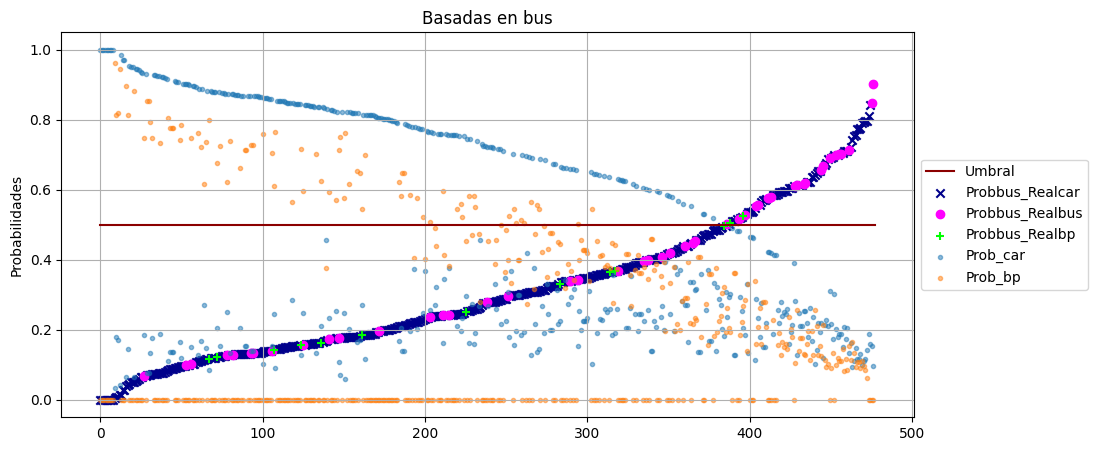

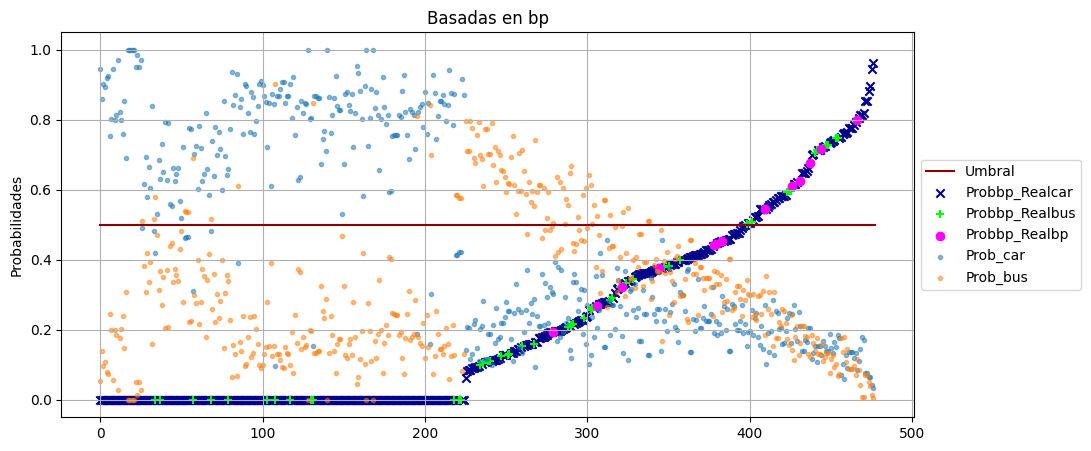

In [120]:
Display_Preds = Logit_model_pred(pandasResults, V, df_test_sr, ['car', 'bus', 'bp'])
Display_Preds.probs_pred_MNL()
Display_Preds.probs
Display_Preds.classification_report()
Display_Preds.confusion_matrix_display()
Display_Preds.ROC_curve()
# # Display_Preds.Precision_Recall_curve()
Display_Preds.Comparative_plot(0)
Display_Preds.Comparative_plot(1)
Display_Preds.Comparative_plot(2)

## Modelo 5.3 (Box-Cox)

Lambda value used for Transformation: 0.944085194010402
Lambda value used for Transformation: -0.06705347956959878
Lambda value used for Transformation: -0.9766469086255786
Lambda value used for Transformation: -1.2021707207710082
Lambda value used for Transformation: -0.612920654129445
Lambda value used for Transformation: -1.143568651170239
Lambda value used for Transformation: -0.07210979146923686
Lambda value used for Transformation: -8.308068614677955


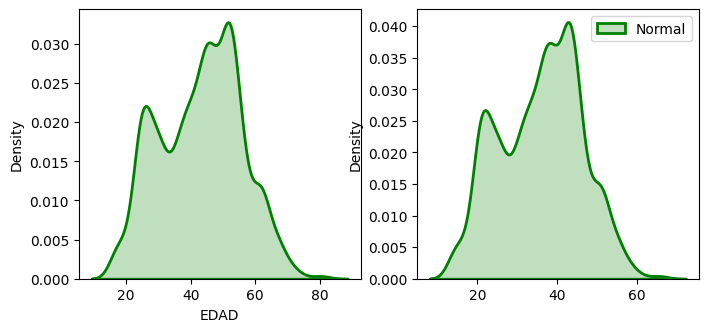

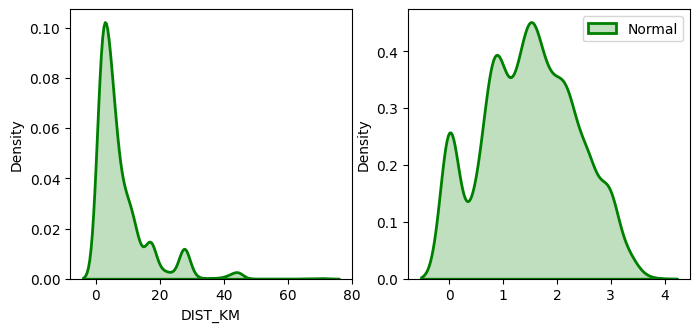

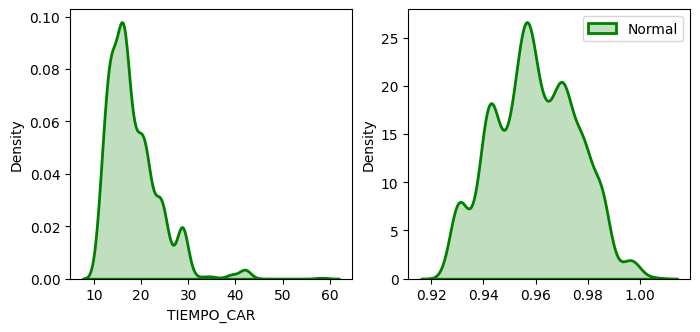

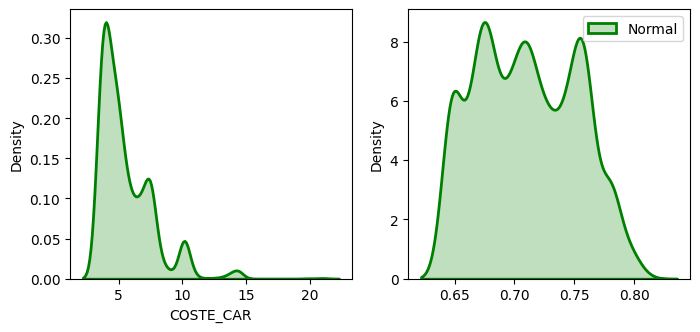

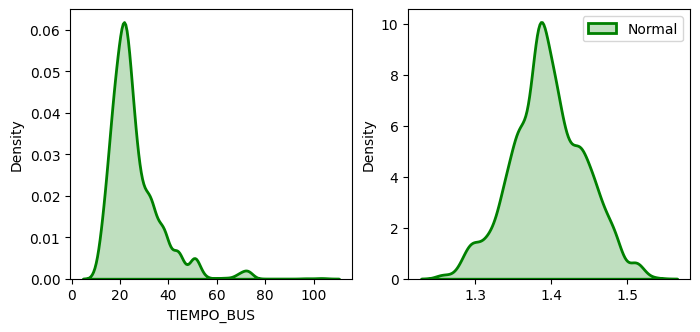

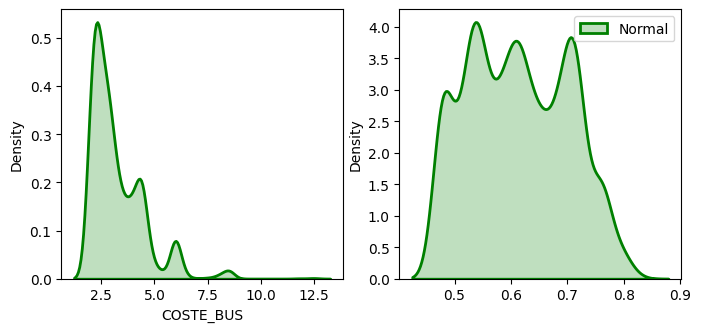

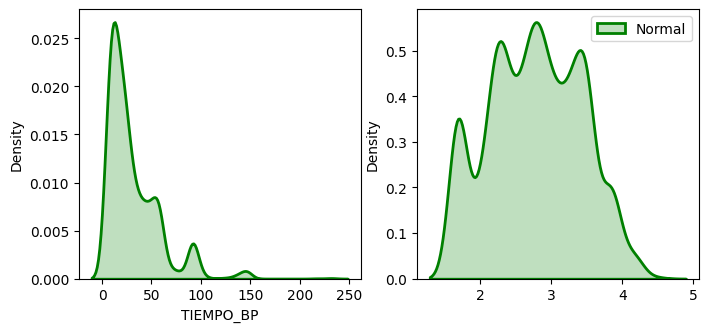

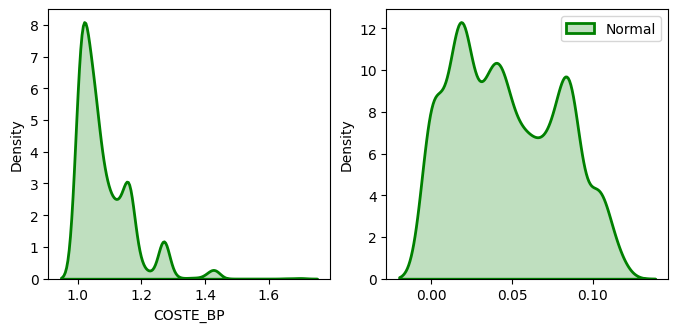

In [121]:
from scipy import stats 
import seaborn as sns

# cont y cat_dep
cont = ['EDAD', 'DIST_KM', 'TIEMPO_CAR','COSTE_CAR', 'TIEMPO_BUS', 'COSTE_BUS', 'TIEMPO_BP', 'COSTE_BP']
cat_dep = ['SEXO_m', 'ESTUDIOS_primaria_terminada', 'ESTUDIOS_secundaria_terminada', 'ESTUDIOS_formacion_profesional',
            'ESTUDIOS_univers_terminada', 'ESTUDIOS_posgrado', 'VIAJE_OBLIGADO_si','MOTIVO_hbo', 'MOTIVO_hbws', "CHOICE"]

# Agregar 1 a todas las variables continuas para que no existan valores iguales a cero.
data_bc = data[cont] + 1

#Transformacion de Box Cox
lambdas=[]

for i in list(data_bc.columns):
    original_data = data_bc[i]
    fitted_data, fitted_lambda = stats.boxcox(original_data) 
    lambdas.append(fitted_lambda)
    data_bc[str(i)]=fitted_data
    fig, ax = plt.subplots(1, 2) 

    sns.distplot(original_data, hist = False, kde = True, 
                kde_kws = {'shade': True, 'linewidth': 2},  
                label = "Non-Normal", color ="green", ax = ax[0]) 

    sns.distplot(fitted_data, hist = False, kde = True, 
                kde_kws = {'shade': True, 'linewidth': 2},  
                label = "Normal", color ="green", ax = ax[1]) 

    plt.legend(loc = "upper right") 

    fig.set_figheight(3.5) 
    fig.set_figwidth(8) 

    print(f"Lambda value used for Transformation: {fitted_lambda}") 


In [122]:
data_bc = data_bc.merge(data[cat_dep], left_index = True, right_index = True)
data_bc

EDAD   DIST_KM  TIEMPO_CAR  COSTE_CAR  TIEMPO_BUS  COSTE_BUS  \
0     38.275294  1.664319    0.954058   0.718516    1.416339   0.630164   
1     50.285078  1.479510    0.963055   0.707497    1.407134   0.607249   
2     36.658730  0.846330    0.942844   0.675171    1.362152   0.537108   
3     36.658730  0.846330    0.950477   0.675171    1.359585   0.537108   
4     39.082093  1.416537    0.946931   0.703704    1.399570   0.599457   
...         ...       ...         ...        ...         ...        ...   
2896  28.509688  2.598147    0.977585   0.759079    1.438439   0.716266   
2897  35.038050  2.376956    0.978607   0.763125    1.436372   0.724740   
2898  43.903448  1.565947    0.967631   0.712532    1.389664   0.617688   
2899  52.665793  2.322755    0.977793   0.759877    1.441782   0.717873   
2900  43.903448  1.235079    0.953751   0.693601    1.402356   0.577322   

      TIEMPO_BP  COSTE_BP  SEXO_m  ESTUDIOS_primaria_terminada  \
0      2.912725  0.051756       1                            0   
1      2.762003  0.040113       1                            0   
2      2.265185  0.018259       1                            0   
3      2.265185  0.018259       1                            0   
4      2.710198  0.040113       1                            1   
...         ...       ...     ...                          ...   
2896   3.530983  0.085291       0                            1   
2897   3.516395  0.089935       0                            0   
2898   2.831863  0.046190       1                            0   
2899   3.469735  0.087706       1                            0   
2900   2.564934  0.033472       1                            0   

      ESTUDIOS_secundaria_terminada  ESTUDIOS_formacion_profesional  \
0                                 1                               0   
1                                 0                               0   
2                                 0                               1   
3                                 0                               1   
4                                 0                               0   
...                             ...                             ...   
2896                              0                               0   
2897                              1                               0   
2898                              0                               0   
2899                              0                               0   
2900                              0                               0   

      ESTUDIOS_univers_terminada  ESTUDIOS_posgrado  VIAJE_OBLIGADO_si  \
0                              0                  0                  0   
1                              0                  0                  1   
2                              0                  0                  0   
3                              0                  0                  0   
4                              0                  0                  1   
...                          ...                ...                ...   
2896                           0                  0                  0   
2897                           0                  0                  1   
2898                           1                  0                  0   
2899                           0                  0                  1   
2900                           0                  0                  1   

      MOTIVO_hbo  MOTIVO_hbws  CHOICE  
0              1            0       1  
1              0            1       0  
2              1            0       1  
3              1            0       1  
4              0            1       1  
...          ...          ...     ...  
2896           1            0       0  
2897           0            1       0  
2898           1            0       2  
2899           0            1       0  
2900           0            1       1  

[2901 rows x 18 columns]

In [123]:
# Transformacion de datos de prueba
df_test_bc = df_test.copy()
df_test_bc[cont] = df_test_bc[cont] + 1

for col in range(len(cont)):
    df_test_bc[cont[col]] = stats.boxcox(df_test_bc[cont[col]], lmbda=lambdas[col])

In [124]:
#Crear el Database de Biogeme a partir del df
database = db.Database('Modelo 5.3 Box-Cox', data_bc)

# The following statement allows you to use the names of the
# variable as Python variable.
globals().update(database.variables)

# Removing some observations
#exclude = No se eliminarán observaciones
#database.remove(exclude)

# Parameters to be estimated
# Arguments:
#   1  Name for report. Typically, the same as the variable
#   2  Starting value
#   3  Lower bound
#   4  Upper bound
#   5  0: estimate the parameter, 1: keep it fixed

ASC_CAR = Beta('ASC_CAR', 0, None, None, 0)
ASC_BUS = Beta('ASC_BUS', 0, None, None, 0)
ASC_BP = Beta('ASC_BP', 0, None, None, 0)
B_TIME_CAR = Beta('B_TIME_CAR', 0, None, None, 0)
B_COST_CAR = Beta('B_COST_CAR', 0, None, None, 0)
B_TIME_BUS = Beta('B_TIME_BUS', 0, None, None, 0)
B_COST_BUS = Beta('B_COST_BUS', 0, None, None, 0)
B_TIME_BP = Beta('B_TIME_BP', 0, None, None, 0)
B_COST_BP = Beta('B_COST_BP', 0, None, None, 0)

B_EDAD_CAR = Beta('B_EDAD_CAR', 0, None, None, 0)
#B_EDAD_BUS = Beta('B_EDAD_BUS', 0, None, None, 0)
#B_EDAD_BP = Beta('B_EDAD_BP', 0, None, None, 0)
B_SEXO_m_CAR = Beta('B_SEXO_m_CAR', 0, None, None, 0)
B_SEXO_m_BUS = Beta('B_SEXO_m_BUS', 0, None, None, 0)
B_SEXO_m_BP = Beta('B_SEXO_m_BP', 0, None, None, 0)
B_DIST_CAR = Beta('B_DIST_CAR', 0, None, None, 0)
B_DIST_BUS = Beta('B_DIST_BUS', 0, None, None, 0)
B_DIST_BP = Beta('B_DIST_BP', 0, None, None, 0)
B_MOTIVO_hbo_CAR = Beta('B_MOTIVO_hbo_CAR', 0, None, None, 0)
B_MOTIVO_hbo_BUS = Beta('B_MOTIVO_hbo_BUS', 0, None, None, 0)
B_MOTIVO_hbo_BP = Beta('B_MOTIVO_hbo_BP', 0, None, None, 0)
B_MOTIVO_hbws_CAR = Beta('B_MOTIVO_hbws_CAR', 0, None, None, 0)
B_MOTIVO_hbws_BUS = Beta('B_MOTIVO_hbws_BUS', 0, None, None, 0)
B_MOTIVO_hbws_BP = Beta('B_MOTIVO_hbws_BP', 0, None, None, 0)
B_ESTUDIOS_pri_termi_CAR = Beta('B_ESTUDIOS_pri_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_pri_termi_BUS = Beta('B_ESTUDIOS_pri_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_pri_termi_BP = Beta('B_ESTUDIOS_pri_termi_BP', 0, None, None, 0)
B_ESTUDIOS_sec_termi_CAR = Beta('B_ESTUDIOS_sec_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_sec_termi_BUS = Beta('B_ESTUDIOS_sec_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_sec_termi_BP = Beta('B_ESTUDIOS_sec_termi_BP', 0, None, None, 0)
B_ESTUDIOS_forma_pro_CAR = Beta('B_ESTUDIOS_forma_pro_CAR', 0, None, None, 0)
B_ESTUDIOS_forma_pro_BUS = Beta('B_ESTUDIOS_forma_pro_BUS', 0, None, None, 0)
B_ESTUDIOS_forma_pro_BP = Beta('B_ESTUDIOS_forma_pro_BP', 0, None, None, 0)
B_ESTUDIOS_uni_termi_CAR = Beta('B_ESTUDIOS_uni_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_uni_termi_BUS = Beta('B_ESTUDIOS_uni_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_uni_termi_BP = Beta('B_ESTUDIOS_uni_termi_BP', 0, None, None, 0)
B_ESTUDIOS_posgrado_CAR = Beta('B_ESTUDIOS_posgrado_CAR', 0, None, None, 0)
B_ESTUDIOS_posgrado_BUS = Beta('B_ESTUDIOS_posgrado_BUS', 0, None, None, 0)
B_ESTUDIOS_posgrado_BP = Beta('B_ESTUDIOS_posgrado_BP', 0, None, None, 0)
B_VIAJE_OBLI_si_CAR = Beta('B_VIAJE_OBLI_si_CAR', 0, None, None, 0)
B_VIAJE_OBLI_si_BUS = Beta('B_VIAJE_OBLI_si_BUS', 0, None, None, 0)
B_VIAJE_OBLI_si_BP = Beta('B_VIAJE_OBLI_si_BP', 0, None, None, 0)
...

# Definition of the utility functions
CAR = ASC_CAR + B_COST_CAR*COSTE_CAR + B_TIME_CAR*TIEMPO_CAR + \
B_EDAD_CAR*EDAD + B_SEXO_m_CAR*SEXO_m + B_DIST_CAR*DIST_KM + \
B_MOTIVO_hbo_CAR*MOTIVO_hbo + B_MOTIVO_hbws_CAR*MOTIVO_hbws + \
B_ESTUDIOS_pri_termi_CAR*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_CAR*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_CAR*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_CAR*ESTUDIOS_univers_terminada + \
B_ESTUDIOS_posgrado_CAR*ESTUDIOS_posgrado + \
B_VIAJE_OBLI_si_CAR*VIAJE_OBLIGADO_si

BUS = ASC_BUS + B_COST_BUS*COSTE_BUS + B_TIME_BUS*TIEMPO_BUS + \
                    B_SEXO_m_BUS*SEXO_m + B_DIST_BUS*DIST_KM + \
B_MOTIVO_hbo_BUS*MOTIVO_hbo + B_MOTIVO_hbws_BUS*MOTIVO_hbws + \
B_ESTUDIOS_pri_termi_BUS*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_BUS*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_BUS*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_BUS*ESTUDIOS_univers_terminada + \
B_ESTUDIOS_posgrado_BUS*ESTUDIOS_posgrado + \
B_VIAJE_OBLI_si_BUS*VIAJE_OBLIGADO_si

BP = ASC_BP + B_COST_BP*COSTE_BP + B_TIME_BP*TIEMPO_BP + \
                B_SEXO_m_BP*SEXO_m + B_DIST_BP*DIST_KM + \
B_MOTIVO_hbo_BP*MOTIVO_hbo + B_MOTIVO_hbws_BP*MOTIVO_hbws + \
B_ESTUDIOS_pri_termi_BP*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_BP*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_BP*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_BP*ESTUDIOS_univers_terminada + \
B_ESTUDIOS_posgrado_BP*ESTUDIOS_posgrado + \
B_VIAJE_OBLI_si_BP*VIAJE_OBLIGADO_si

# Associate utility functions with the numbering of alternatives
V = {0: CAR, 1: BUS, 2: BP}

# The choice model is a logit, without availability conditions
logprob = models.loglogit(V, None, CHOICE)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = "MODELO  5.3 Box-Cox"

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults.round(4))

                             Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_BP                    -35.8530       10.2358      -3.5027        0.0005
ASC_BUS                    19.6373        6.2352       3.1494        0.0016
ASC_CAR                    16.2157       15.6663       1.0351        0.3006
B_COST_BP                  36.3196       27.1351       1.3385        0.1807
B_COST_BUS                -83.2981       20.5196      -4.0594        0.0000
B_COST_CAR               -138.2167       43.4967      -3.1776        0.0015
B_DIST_BP                   7.3941        1.0712       6.9024        0.0000
B_DIST_BUS                 -2.1686        0.5756      -3.7675        0.0002
B_DIST_CAR                 -5.2255        0.6224      -8.3957        0.0000
B_EDAD_CAR                  0.0165        0.0055       3.0250        0.0025
B_ESTUDIOS_forma_pro_BP     6.1310        0.1413      43.3870        0.0000
B_ESTUDIOS_forma_pro_BUS   -3.4658        0.1170     -29.6276        0.0000
B_ESTUDIOS_f

              precision    recall  f1-score   support

         car       0.96      0.50      0.66       416
         bus       0.18      0.52      0.27        48
          bp       0.08      0.77      0.15        13

    accuracy                           0.51       477
   macro avg       0.41      0.60      0.36       477
weighted avg       0.86      0.51      0.61       477



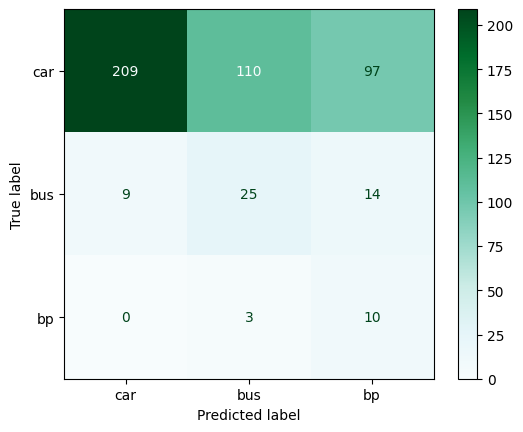

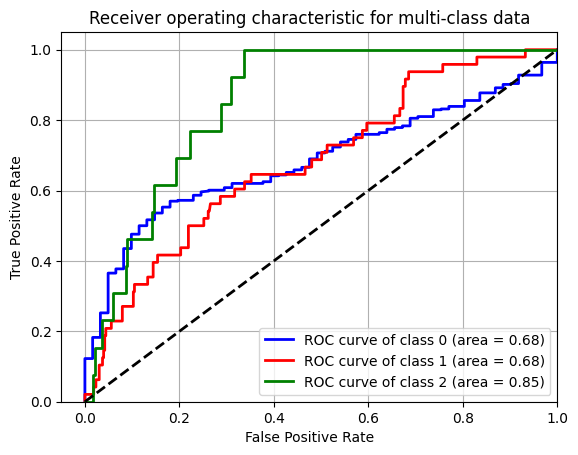

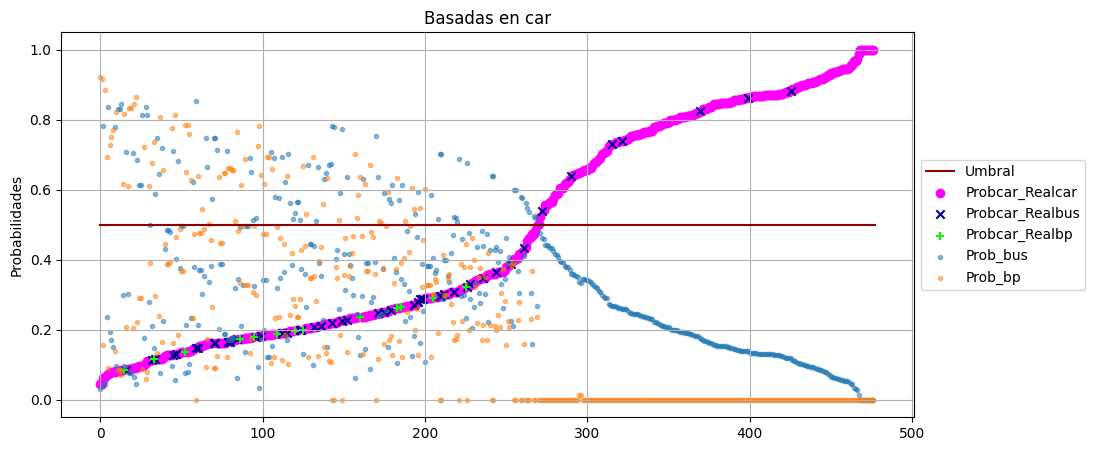

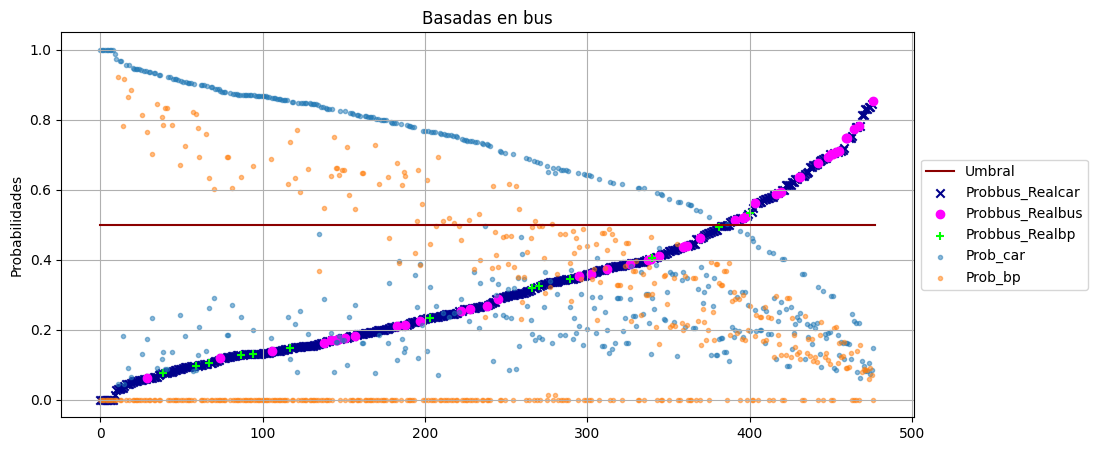

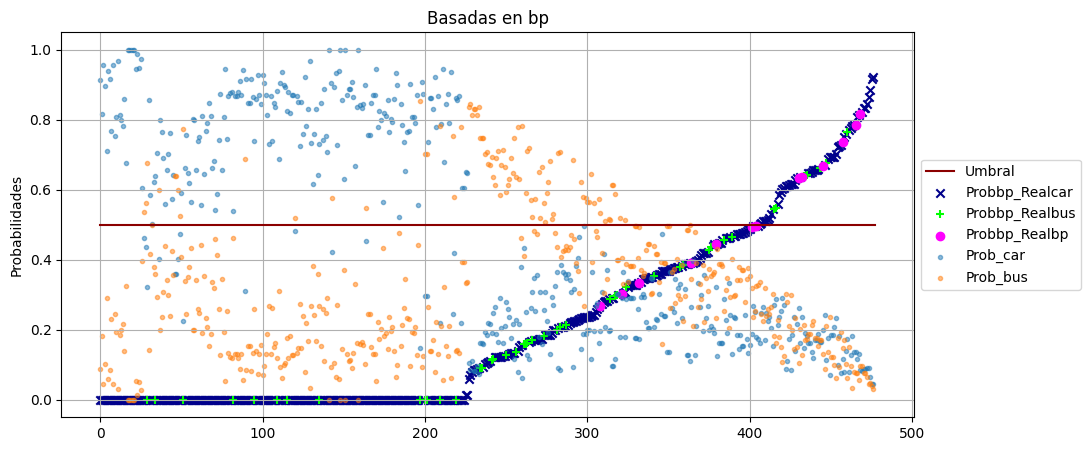

In [125]:
Display_Preds = Logit_model_pred(pandasResults, V, df_test_bc, ['car', 'bus', 'bp'])
Display_Preds.probs_pred_MNL()
Display_Preds.probs
Display_Preds.classification_report()
Display_Preds.confusion_matrix_display()
Display_Preds.ROC_curve()
# # Display_Preds.Precision_Recall_curve()
Display_Preds.Comparative_plot(0)
Display_Preds.Comparative_plot(1)
Display_Preds.Comparative_plot(2)

## Modelo 5.4 (PCA)

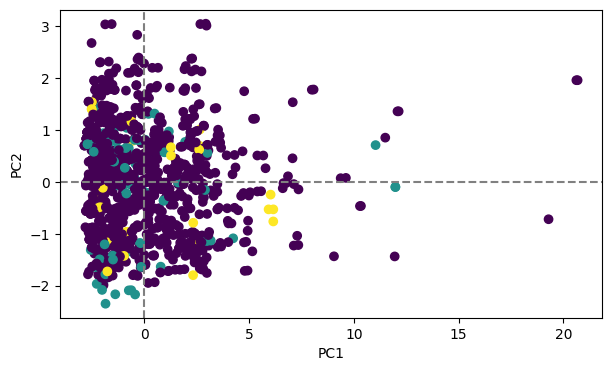

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Datos de entrenamiento
#X = df_train.drop(columns=['CHOICE', "CAR", 'BUS','BP', 'custom_id'])
X = df_train[cont]
y = df_train.CHOICE


# X = bal_df[cont]
# y = bal_df.CHOICE

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.concatenate((X_scaled, df_train[cat_dep].values), axis=1)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=[7,4])
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(y=0, color='grey', linestyle='--')
plt.axvline(x=0, color='grey', linestyle='--')
plt.show()

In [127]:
# Convertir los arrays en dataframe de pandas
df_train_PCA = pd.DataFrame(X_pca, columns = ["PC1", "PC2"])
df_train_PCA["CHOICE"] = y
df_train_PCA.sample(3)

PC1       PC2  CHOICE
926  -2.549893 -0.887568       0
838  20.624489  1.958322       0
568  -1.941502 -1.758013       0

In [128]:
# Datos de prueba
X = df_test.drop(columns=['CHOICE', "CAR", 'BUS','BP', 'custom_id'])
y = df_test.CHOICE

#scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.concatenate((X_scaled, df_test[cat_dep].values), axis=1)
#pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_test_PCA = pd.DataFrame(X_pca, columns = ["PC1", "PC2"])
df_test_PCA["CHOICE"] = y
df_test_PCA.sample(3)

PC1       PC2  CHOICE
93  -2.716896  0.644973       0
152  1.651067  1.934839       0
50  -0.205314  1.434206       0

In [129]:
#Crear el Database de Biogeme a partir del df
database = db.Database('Modelo 5.4 PCA', df_train_PCA)

# The following statement allows you to use the names of the
# variable as Python variable.
globals().update(database.variables)

# Removing some observations
#exclude = No se eliminarán observaciones
#database.remove(exclude)

# Parameters to be estimated
# Arguments:
#   1  Name for report. Typically, the same as the variable
#   2  Starting value
#   3  Lower bound
#   4  Upper bound
#   5  0: estimate the parameter, 1: keep it fixed

ASC_CAR = Beta('ASC_CAR', 0, None, None, 0)
ASC_BUS = Beta('ASC_BUS', 0, None, None, 0)
ASC_BP = Beta('ASC_BP', 0, None, None, 0)
B_PC1_CAR = Beta('B_PC1_CAR', 0, None, None, 0)
B_PC2_CAR = Beta('B_PC2_CAR', 0, None, None, 0)
B_PC1_BUS = Beta('B_PC1_BUS', 0, None, None, 0)
B_PC2_BUS = Beta('B_PC2_BUS', 0, None, None, 0)
B_PC1_BP = Beta('B_PC1_BP', 0, None, None, 0)
B_PC2_BP = Beta('B_PC2_BP', 0, None, None, 0)
...

# Definition of the utility functions
CAR = ASC_CAR + B_PC1_CAR*PC1 + B_PC2_CAR*PC2

BUS = ASC_BUS + B_PC1_BUS*PC1 + B_PC2_BUS*PC2

BP = ASC_BP + B_PC1_BP*PC1 + B_PC2_BP*PC2

# Associate utility functions with the numbering of alternatives
V = {0: CAR, 1: BUS, 2: BP}

# The choice model is a logit, without availability conditions
logprob = models.loglogit(V, None, CHOICE)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = "MODELO  5.4 PCA"

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults.round(4))

            Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_BP    -1.5912        0.1291     -12.3253        0.0000
ASC_BUS   -0.2944        0.0907      -3.2443        0.0012
ASC_CAR    1.8856        0.0735      25.6714        0.0000
B_PC1_BP   0.0557        0.0425       1.3088        0.1906
B_PC1_BUS -0.0685        0.0406      -1.6863        0.0917
B_PC1_CAR  0.0128        0.0269       0.4759        0.6342
B_PC2_BP  -0.1231        0.1297      -0.9487        0.3428
B_PC2_BUS -0.0113        0.0874      -0.1294        0.8970
B_PC2_CAR  0.1344        0.0721       1.8642        0.0623


              precision    recall  f1-score   support

         car       0.87      1.00      0.93       416
         bus       0.00      0.00      0.00        48
          bp       0.00      0.00      0.00        13

    accuracy                           0.87       477
   macro avg       0.29      0.33      0.31       477
weighted avg       0.76      0.87      0.81       477



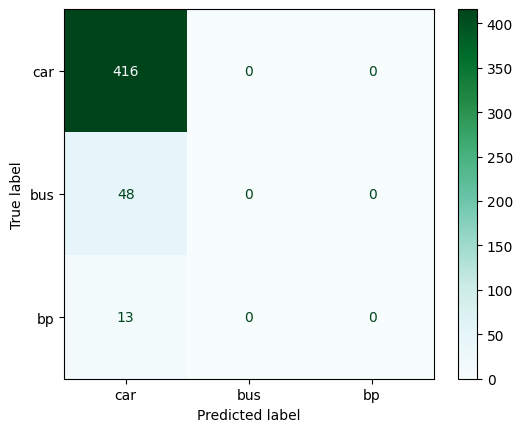

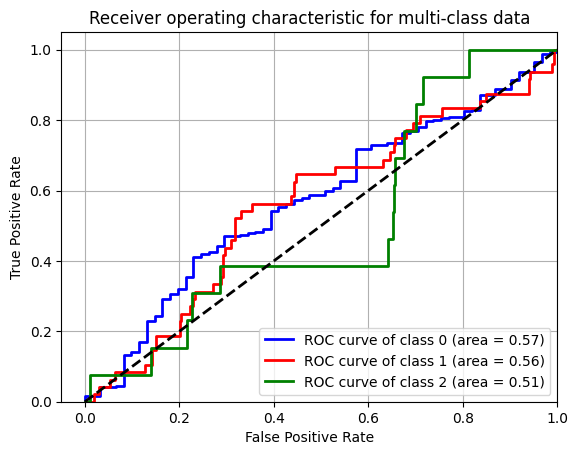

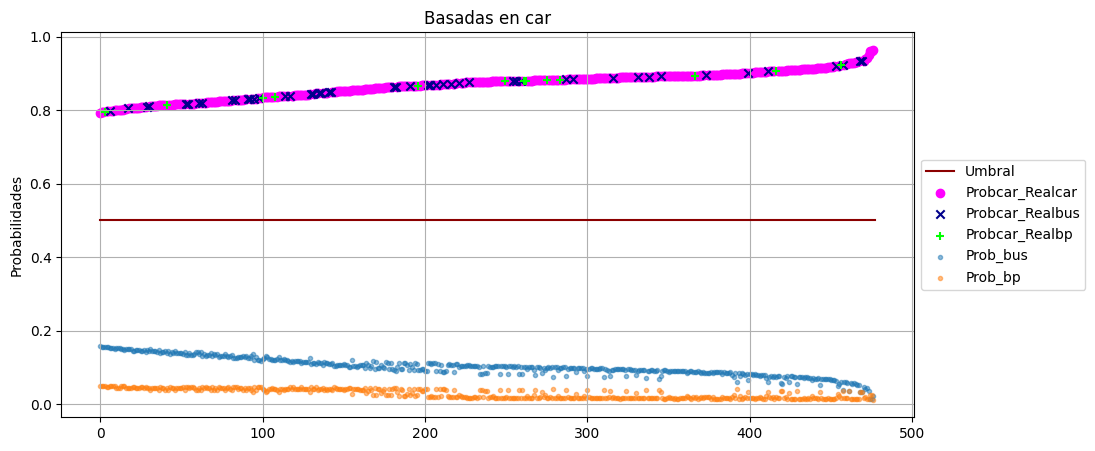

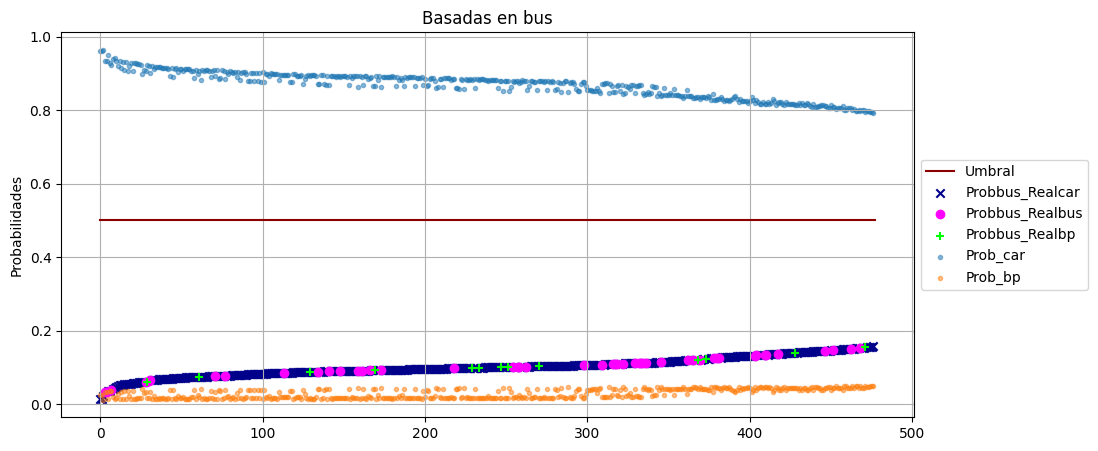

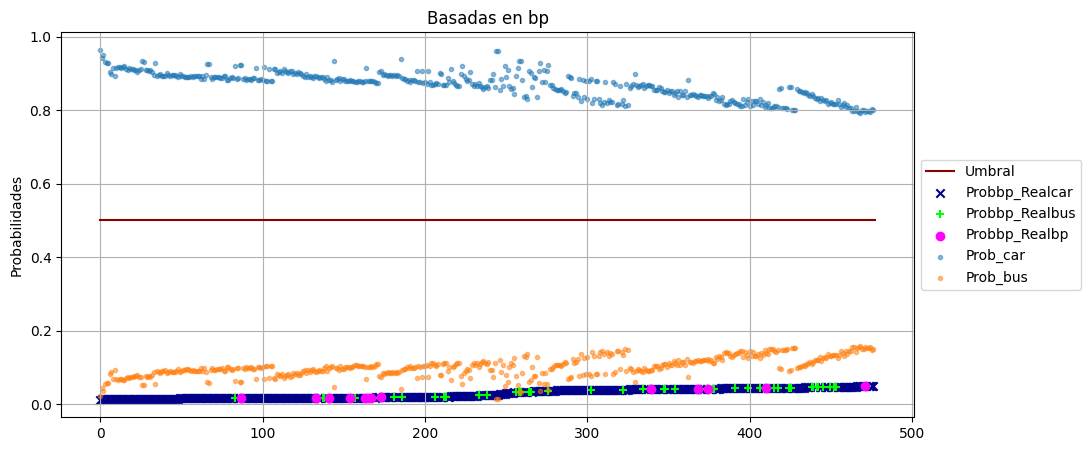

In [130]:
Display_Preds = Logit_model_pred(pandasResults, V, df_test_PCA, ['car', 'bus', 'bp'])
Display_Preds.probs_pred_MNL()
Display_Preds.probs
Display_Preds.classification_report()
Display_Preds.confusion_matrix_display()
Display_Preds.ROC_curve()
# # Display_Preds.Precision_Recall_curve()
Display_Preds.Comparative_plot(0)
Display_Preds.Comparative_plot(1)
Display_Preds.Comparative_plot(2)

## Modelo 6.1 NL: NEST_NOCAR


In [131]:
#Crear el Database de Biogeme a partir del df
database = db.Database('Modelo 6.1 NL: NEST_NOCAR', data)

# The following statement allows you to use the names of the
# variable as Python variable.
globals().update(database.variables)

# Removing some observations
#exclude = No se eliminarán observaciones
#database.remove(exclude)

# Parameters to be estimated
# Arguments:
#   1  Name for report. Typically, the same as the variable
#   2  Starting value
#   3  Lower bound
#   4  Upper bound
#   5  0: estimate the parameter, 1: keep it fixed

ASC_CAR = Beta('ASC_CAR', 0, None, None, 0)
#ASC_BUS = Beta('ASC_BUS', 0, None, None, 0)
ASC_BP = Beta('ASC_BP', 0, None, None, 0)
B_TIME_CAR = Beta('B_TIME_CAR', 0, None, None, 0)
#B_COST_CAR = Beta('B_COST_CAR', 0, None, None, 0)
B_TIME_BUS = Beta('B_TIME_BUS', 0, None, None, 0)
B_COST_BUS = Beta('B_COST_BUS', 0, None, None, 0)
B_TIME_BP = Beta('B_TIME_BP', 0, None, None, 0)
B_COST_BP = Beta('B_COST_BP', 0, None, None, 0)

B_EDAD_CAR = Beta('B_EDAD_CAR', 0, None, None, 0)
B_EDAD_BUS = Beta('B_EDAD_BUS', 0, None, None, 0)
B_EDAD_BP = Beta('B_EDAD_BP', 0, None, None, 0)
B_SEXO_m_CAR = Beta('B_SEXO_m_CAR', 0, None, None, 0)
B_SEXO_m_BUS = Beta('B_SEXO_m_BUS', 0, None, None, 0)
B_SEXO_m_BP = Beta('B_SEXO_m_BP', 0, None, None, 0)
B_DIST_CAR = Beta('B_DIST_CAR', 0, None, None, 0)
B_DIST_BUS = Beta('B_DIST_BUS', 0, None, None, 0)
B_DIST_BP = Beta('B_DIST_BP', 0, None, None, 0)
# B_MOTIVO_hbo_CAR = Beta('B_MOTIVO_hbo_CAR', 0, None, None, 0)
# B_MOTIVO_hbo_BUS = Beta('B_MOTIVO_hbo_BUS', 0, None, None, 0)
# B_MOTIVO_hbo_BP = Beta('B_MOTIVO_hbo_BP', 0, None, None, 0)
# B_MOTIVO_hbws_CAR = Beta('B_MOTIVO_hbws_CAR', 0, None, None, 0)
# B_MOTIVO_hbws_BUS = Beta('B_MOTIVO_hbws_BUS', 0, None, None, 0)
# B_MOTIVO_hbws_BP = Beta('B_MOTIVO_hbws_BP', 0, None, None, 0)
# B_ESTUDIOS_pri_termi_CAR = Beta('B_ESTUDIOS_pri_termi_CAR', 0, None, None, 0)
# B_ESTUDIOS_pri_termi_BUS = Beta('B_ESTUDIOS_pri_termi_BUS', 0, None, None, 0)
# B_ESTUDIOS_pri_termi_BP = Beta('B_ESTUDIOS_pri_termi_BP', 0, None, None, 0)
# B_ESTUDIOS_sec_termi_CAR = Beta('B_ESTUDIOS_sec_termi_CAR', 0, None, None, 0)
# B_ESTUDIOS_sec_termi_BUS = Beta('B_ESTUDIOS_sec_termi_BUS', 0, None, None, 0)
# B_ESTUDIOS_sec_termi_BP = Beta('B_ESTUDIOS_sec_termi_BP', 0, None, None, 0)
# B_ESTUDIOS_forma_pro_CAR = Beta('B_ESTUDIOS_forma_pro_CAR', 0, None, None, 0)
# B_ESTUDIOS_forma_pro_BUS = Beta('B_ESTUDIOS_forma_pro_BUS', 0, None, None, 0)
# B_ESTUDIOS_forma_pro_BP = Beta('B_ESTUDIOS_forma_pro_BP', 0, None, None, 0)
# B_ESTUDIOS_uni_termi_CAR = Beta('B_ESTUDIOS_uni_termi_CAR', 0, None, None, 0)
# B_ESTUDIOS_uni_termi_BUS = Beta('B_ESTUDIOS_uni_termi_BUS', 0, None, None, 0)
# B_ESTUDIOS_uni_termi_BP = Beta('B_ESTUDIOS_uni_termi_BP', 0, None, None, 0)
# B_ESTUDIOS_posgrado_CAR = Beta('B_ESTUDIOS_posgrado_CAR', 0, None, None, 0)
# B_ESTUDIOS_posgrado_BUS = Beta('B_ESTUDIOS_posgrado_BUS', 0, None, None, 0)
# B_ESTUDIOS_posgrado_BP = Beta('B_ESTUDIOS_posgrado_BP', 0, None, None, 0)
# B_VIAJE_OBLI_si_CAR = Beta('B_VIAJE_OBLI_si_CAR', 0, None, None, 0)
# B_VIAJE_OBLI_si_BUS = Beta('B_VIAJE_OBLI_si_BUS', 0, None, None, 0)
# B_VIAJE_OBLI_si_BP = Beta('B_VIAJE_OBLI_si_BP', 0, None, None, 0)
...

# Definition of the utility functions
CAR = ASC_CAR + B_TIME_CAR*TIEMPO_CAR + \
B_EDAD_CAR*EDAD + B_SEXO_m_CAR*SEXO_m #+ B_DIST_CAR*DIST_KM 
# B_MOTIVO_hbo_CAR*MOTIVO_hbo + B_MOTIVO_hbws_CAR*MOTIVO_hbws + \
# B_ESTUDIOS_pri_termi_CAR*ESTUDIOS_primaria_terminada	+ \
# B_ESTUDIOS_sec_termi_CAR*ESTUDIOS_secundaria_terminada + \
# B_ESTUDIOS_forma_pro_CAR*ESTUDIOS_formacion_profesional + \
# B_ESTUDIOS_uni_termi_CAR*ESTUDIOS_univers_terminada + \
# B_ESTUDIOS_posgrado_CAR*ESTUDIOS_posgrado + \
# B_VIAJE_OBLI_si_CAR*VIAJE_OBLIGADO_si

BUS =  B_COST_BUS*COSTE_BUS + B_TIME_BUS*TIEMPO_BUS + \
B_EDAD_BUS*EDAD + B_SEXO_m_BUS*SEXO_m #+ B_DIST_BUS*DIST_KM 
# B_MOTIVO_hbo_BUS*MOTIVO_hbo + B_MOTIVO_hbws_BUS*MOTIVO_hbws + \
# B_ESTUDIOS_pri_termi_BUS*ESTUDIOS_primaria_terminada	+ \
# B_ESTUDIOS_sec_termi_BUS*ESTUDIOS_secundaria_terminada + \
# B_ESTUDIOS_forma_pro_BUS*ESTUDIOS_formacion_profesional + \
# B_ESTUDIOS_uni_termi_BUS*ESTUDIOS_univers_terminada + \
# B_ESTUDIOS_posgrado_BUS*ESTUDIOS_posgrado + \
# B_VIAJE_OBLI_si_BUS*VIAJE_OBLIGADO_si

BP = ASC_BP + B_COST_BP*COSTE_BP + B_TIME_BP*TIEMPO_BP + \
B_EDAD_BP*EDAD + B_SEXO_m_BP*SEXO_m #+ B_DIST_BP*DIST_KM 
# B_MOTIVO_hbo_BP*MOTIVO_hbo + B_MOTIVO_hbws_BP*MOTIVO_hbws + \
# B_ESTUDIOS_pri_termi_BP*ESTUDIOS_primaria_terminada	+ \
# B_ESTUDIOS_sec_termi_BP*ESTUDIOS_secundaria_terminada + \
# B_ESTUDIOS_forma_pro_BP*ESTUDIOS_formacion_profesional + \
# B_ESTUDIOS_uni_termi_BP*ESTUDIOS_univers_terminada + \
# B_ESTUDIOS_posgrado_BP*ESTUDIOS_posgrado + \
# B_VIAJE_OBLI_si_BP*VIAJE_OBLIGADO_si

# Associate utility functions with the numbering of alternatives
V = {0: CAR, 1: BUS, 2: BP}

# availability 
av = {0:1,
      1:1,
      2:1}

# DEFINITION OF THE NESTS:
# nest parameter 
NEST_NOCAR = Beta("NEST_NOCAR",1, None, None, 0)
#NEST_CAR = Beta("NEST_CAR",1, None, None, 0)
# list of alternatives
NO_CAR = NEST_NOCAR, [1,2]
CAR = 1.0, [0]

nests=NO_CAR, CAR

# The choice model is a logit, without availability conditions
logprob = models.lognested(V, av,nests, CHOICE)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = "Modelo 6.1 NL: NEST_NOCAR"

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults.round(4))

                Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_BP        -1.4844        0.0519     -28.6000        0.0000
ASC_CAR       -0.8583        0.3133      -2.7399        0.0061
B_COST_BP      4.4760        1.3025       3.4365        0.0006
B_COST_BUS     0.5496        0.1403       3.9167        0.0001
B_EDAD_BP     -0.0064        0.0013      -4.9011        0.0000
B_EDAD_BUS    -0.0054        0.0013      -4.1355        0.0000
B_EDAD_CAR     0.0118        0.0026       4.5696        0.0000
B_SEXO_m_BP    2.1290        0.0519      41.0203        0.0000
B_SEXO_m_BUS   0.1623        0.0541       2.9980        0.0027
B_SEXO_m_CAR  -2.2914        0.0695     -32.9469        0.0000
B_TIME_BP      0.0107        0.0036       2.9481        0.0032
B_TIME_BUS    -0.0043        0.0017      -2.4424        0.0146
B_TIME_CAR     0.1439        0.0310       4.6390        0.0000
NEST_NOCAR    16.2145        4.9197       3.2958        0.0010


              precision    recall  f1-score   support

         car       0.00      0.00      0.00       416
         bus       0.09      0.58      0.15        48
          bp       0.06      0.69      0.11        13

    accuracy                           0.08       477
   macro avg       0.05      0.43      0.09       477
weighted avg       0.01      0.08      0.02       477



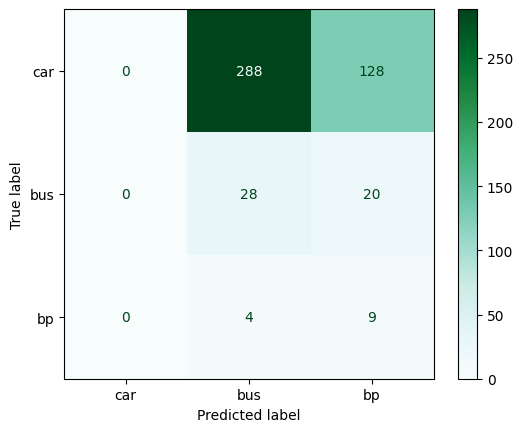

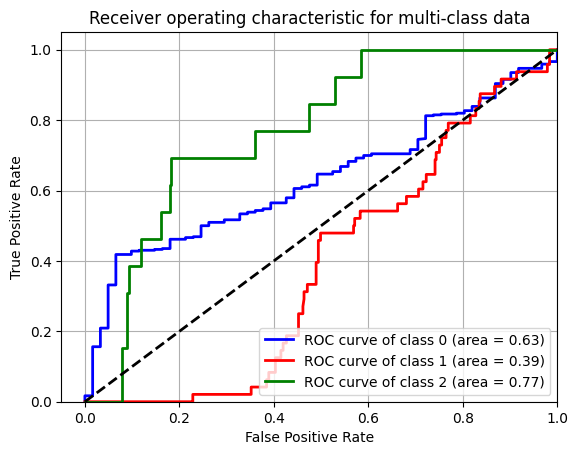

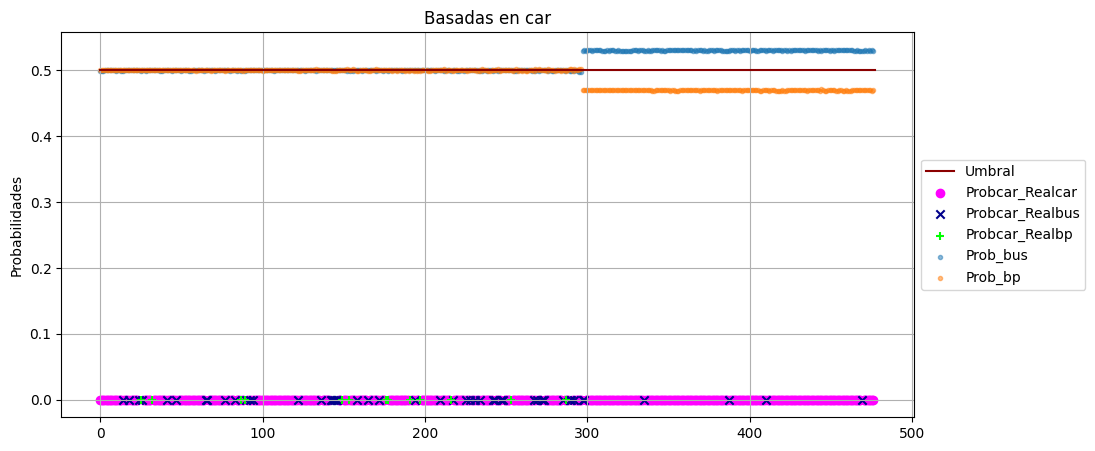

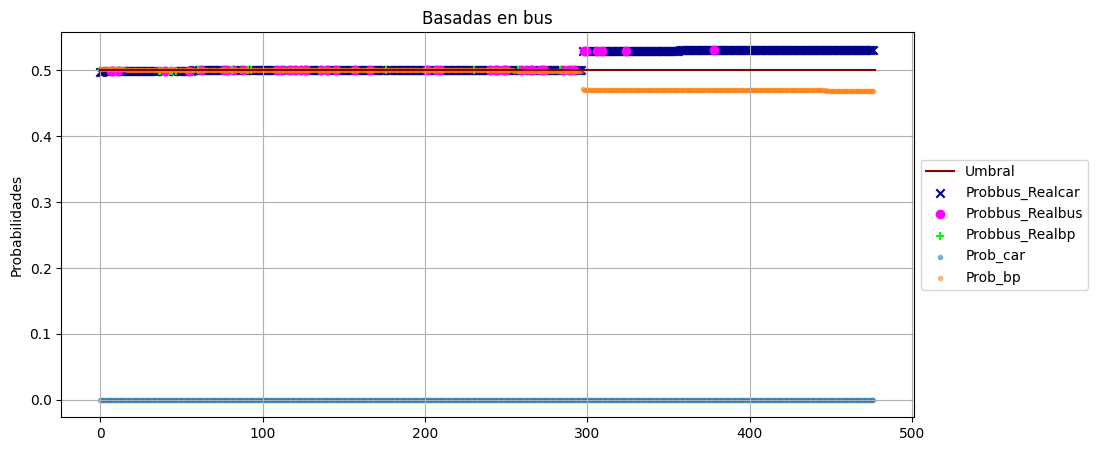

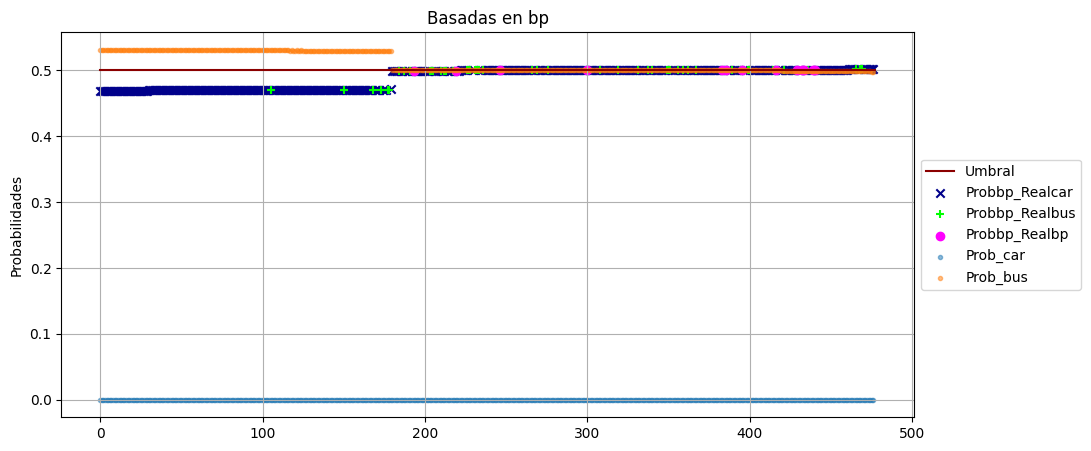

In [132]:
Display_Preds = Logit_model_pred(pandasResults, V, df_test, ['car', 'bus', 'bp'])
Display_Preds.probs_pred_NL(nests)
#Display_Preds.probs
Display_Preds.classification_report()
Display_Preds.confusion_matrix_display()
Display_Preds.ROC_curve()
# # Display_Preds.Precision_Recall_curve()
Display_Preds.Comparative_plot(0)
Display_Preds.Comparative_plot(1)
Display_Preds.Comparative_plot(2)

## Modelo 6.2 NL: NEST_NOBUS


In [133]:
#Crear el Database de Biogeme a partir del df
database = db.Database('Modelo 6.2 NL: NEST_NOBUS', data)

# The following statement allows you to use the names of the
# variable as Python variable.
globals().update(database.variables)

# Removing some observations
#exclude = No se eliminarán observaciones
#database.remove(exclude)

# Parameters to be estimated
# Arguments:
#   1  Name for report. Typically, the same as the variable
#   2  Starting value
#   3  Lower bound
#   4  Upper bound
#   5  0: estimate the parameter, 1: keep it fixed

ASC_CAR = Beta('ASC_CAR', 0, None, None, 0)
ASC_BUS = Beta('ASC_BUS', 0, None, None, 0)
ASC_BP = Beta('ASC_BP', 0, None, None, 0)
#B_TIME_CAR = Beta('B_TIME_CAR', 0, None, None, 0)
B_COST_CAR = Beta('B_COST_CAR', 0, None, None, 0)
#B_TIME_BUS = Beta('B_TIME_BUS', 0, None, None, 0)
B_COST_BUS = Beta('B_COST_BUS', 0, None, None, 0)
#B_TIME_BP = Beta('B_TIME_BP', 0, None, None, 0)
B_COST_BP = Beta('B_COST_BP', 0, None, None, 0)

# B_EDAD_CAR = Beta('B_EDAD_CAR', 0, None, None, 0)
# B_EDAD_BUS = Beta('B_EDAD_BUS', 0, None, None, 0)
# B_EDAD_BP = Beta('B_EDAD_BP', 0, None, None, 0)
# B_SEXO_m_CAR = Beta('B_SEXO_m_CAR', 0, None, None, 0)
# B_SEXO_m_BUS = Beta('B_SEXO_m_BUS', 0, None, None, 0)
# B_SEXO_m_BP = Beta('B_SEXO_m_BP', 0, None, None, 0)
# B_DIST_CAR = Beta('B_DIST_CAR', 0, None, None, 0)
# B_DIST_BUS = Beta('B_DIST_BUS', 0, None, None, 0)
# B_DIST_BP = Beta('B_DIST_BP', 0, None, None, 0)
# B_MOTIVO_hbo_CAR = Beta('B_MOTIVO_hbo_CAR', 0, None, None, 0)
# B_MOTIVO_hbo_BUS = Beta('B_MOTIVO_hbo_BUS', 0, None, None, 0)
# B_MOTIVO_hbo_BP = Beta('B_MOTIVO_hbo_BP', 0, None, None, 0)
# B_MOTIVO_hbws_CAR = Beta('B_MOTIVO_hbws_CAR', 0, None, None, 0)
# B_MOTIVO_hbws_BUS = Beta('B_MOTIVO_hbws_BUS', 0, None, None, 0)
# B_MOTIVO_hbws_BP = Beta('B_MOTIVO_hbws_BP', 0, None, None, 0)
# B_ESTUDIOS_pri_termi_CAR = Beta('B_ESTUDIOS_pri_termi_CAR', 0, None, None, 0)
# B_ESTUDIOS_pri_termi_BUS = Beta('B_ESTUDIOS_pri_termi_BUS', 0, None, None, 0)
# B_ESTUDIOS_pri_termi_BP = Beta('B_ESTUDIOS_pri_termi_BP', 0, None, None, 0)
# B_ESTUDIOS_sec_termi_CAR = Beta('B_ESTUDIOS_sec_termi_CAR', 0, None, None, 0)
# B_ESTUDIOS_sec_termi_BUS = Beta('B_ESTUDIOS_sec_termi_BUS', 0, None, None, 0)
# B_ESTUDIOS_sec_termi_BP = Beta('B_ESTUDIOS_sec_termi_BP', 0, None, None, 0)
# B_ESTUDIOS_forma_pro_CAR = Beta('B_ESTUDIOS_forma_pro_CAR', 0, None, None, 0)
# B_ESTUDIOS_forma_pro_BUS = Beta('B_ESTUDIOS_forma_pro_BUS', 0, None, None, 0)
# B_ESTUDIOS_forma_pro_BP = Beta('B_ESTUDIOS_forma_pro_BP', 0, None, None, 0)
# B_ESTUDIOS_uni_termi_CAR = Beta('B_ESTUDIOS_uni_termi_CAR', 0, None, None, 0)
# B_ESTUDIOS_uni_termi_BUS = Beta('B_ESTUDIOS_uni_termi_BUS', 0, None, None, 0)
# B_ESTUDIOS_uni_termi_BP = Beta('B_ESTUDIOS_uni_termi_BP', 0, None, None, 0)
# B_ESTUDIOS_posgrado_CAR = Beta('B_ESTUDIOS_posgrado_CAR', 0, None, None, 0)
# B_ESTUDIOS_posgrado_BUS = Beta('B_ESTUDIOS_posgrado_BUS', 0, None, None, 0)
# B_ESTUDIOS_posgrado_BP = Beta('B_ESTUDIOS_posgrado_BP', 0, None, None, 0)
# B_VIAJE_OBLI_si_CAR = Beta('B_VIAJE_OBLI_si_CAR', 0, None, None, 0)
# B_VIAJE_OBLI_si_BUS = Beta('B_VIAJE_OBLI_si_BUS', 0, None, None, 0)
# B_VIAJE_OBLI_si_BP = Beta('B_VIAJE_OBLI_si_BP', 0, None, None, 0)
...

# Definition of the utility functions
CAR = ASC_CAR + B_COST_CAR*COSTE_CAR #+ B_TIME_CAR*TIEMPO_CAR 
B_EDAD_CAR*EDAD #+ B_SEXO_m_CAR*SEXO_m + B_DIST_CAR*DIST_KM + \
# B_MOTIVO_hbo_CAR*MOTIVO_hbo + B_MOTIVO_hbws_CAR*MOTIVO_hbws + \
# B_ESTUDIOS_pri_termi_CAR*ESTUDIOS_primaria_terminada	+ \
# B_ESTUDIOS_sec_termi_CAR*ESTUDIOS_secundaria_terminada + \
# B_ESTUDIOS_forma_pro_CAR*ESTUDIOS_formacion_profesional + \
# B_ESTUDIOS_uni_termi_CAR*ESTUDIOS_univers_terminada + \
# B_ESTUDIOS_posgrado_CAR*ESTUDIOS_posgrado + \
# B_VIAJE_OBLI_si_CAR*VIAJE_OBLIGADO_si

BUS =  B_COST_BUS*COSTE_BUS #+ B_TIME_BUS*TIEMPO_BUS 
B_EDAD_BUS*EDAD #+ B_SEXO_m_BUS*SEXO_m + B_DIST_BUS*DIST_KM + \
# B_MOTIVO_hbo_BUS*MOTIVO_hbo + B_MOTIVO_hbws_BUS*MOTIVO_hbws + \
# B_ESTUDIOS_pri_termi_BUS*ESTUDIOS_primaria_terminada	+ \
# B_ESTUDIOS_sec_termi_BUS*ESTUDIOS_secundaria_terminada + \
# B_ESTUDIOS_forma_pro_BUS*ESTUDIOS_formacion_profesional + \
# B_ESTUDIOS_uni_termi_BUS*ESTUDIOS_univers_terminada + \
# B_ESTUDIOS_posgrado_BUS*ESTUDIOS_posgrado + \
# B_VIAJE_OBLI_si_BUS*VIAJE_OBLIGADO_si

BP = ASC_BP + B_COST_BP*COSTE_BP #+ B_TIME_BP*TIEMPO_BP 
B_EDAD_BP*EDAD #+ B_SEXO_m_BP*SEXO_m + B_DIST_BP*DIST_KM + \
# B_MOTIVO_hbo_BP*MOTIVO_hbo + B_MOTIVO_hbws_BP*MOTIVO_hbws + \
# B_ESTUDIOS_pri_termi_BP*ESTUDIOS_primaria_terminada	+ \
# B_ESTUDIOS_sec_termi_BP*ESTUDIOS_secundaria_terminada + \
# B_ESTUDIOS_forma_pro_BP*ESTUDIOS_formacion_profesional + \
# B_ESTUDIOS_uni_termi_BP*ESTUDIOS_univers_terminada + \
# B_ESTUDIOS_posgrado_BP*ESTUDIOS_posgrado + \
# B_VIAJE_OBLI_si_BP*VIAJE_OBLIGADO_si

# Associate utility functions with the numbering of alternatives
V = {0: CAR, 1: BUS, 2: BP}

# availability 
av = {0:1,
      1:1,
      2:1}

# DEFINITION OF THE NESTS:
# nest parameter 
NEST_NOBUS = Beta("NEST_NOBUS",1, None, None, 0)
#NEST_CAR = Beta("NEST_CAR",0, None, None, 0)
# list of alternatives
BUS = 1.0, [1]
NO_BUS = NEST_NOBUS, [0,2]

nests=BUS, NO_BUS

# The choice model is a logit, without availability conditions
logprob = models.lognested(V, av,nests, CHOICE)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = "Modelo 6.2 NL: NEST_NOBUS"

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults.round(4))

               Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_BP        6.8445        1.7965       3.8099        0.0001
ASC_CAR      -5.3087        1.3091      -4.0552        0.0001
B_COST_BP   128.6793       31.3161       4.1090        0.0000
B_COST_BUS    8.3160        2.0716       4.0143        0.0001
B_COST_CAR    5.0063        1.2199       4.1037        0.0000
NEST_NOBUS    0.3873        0.1272       3.0458        0.0023


              precision    recall  f1-score   support

         car       0.00      0.00      0.00       416
         bus       0.10      0.98      0.18        48
          bp       0.00      0.00      0.00        13

    accuracy                           0.10       477
   macro avg       0.03      0.33      0.06       477
weighted avg       0.01      0.10      0.02       477



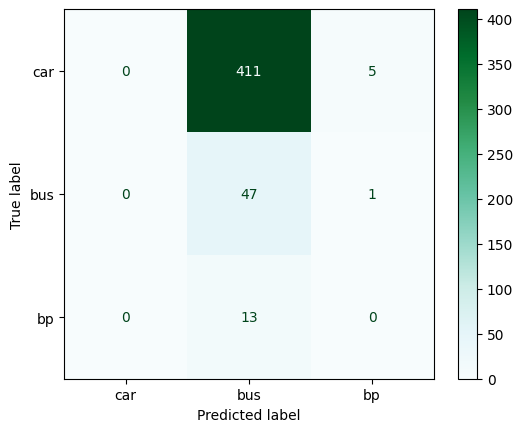

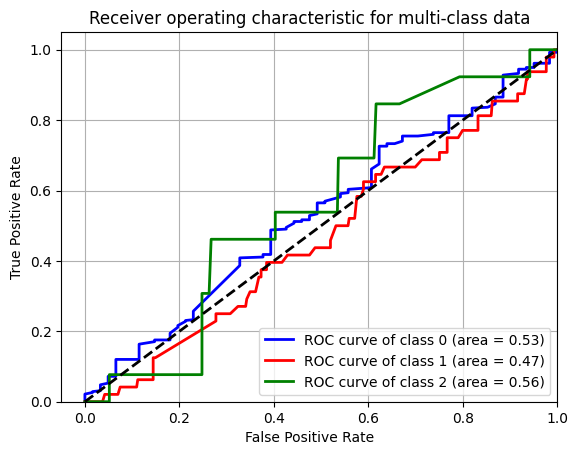

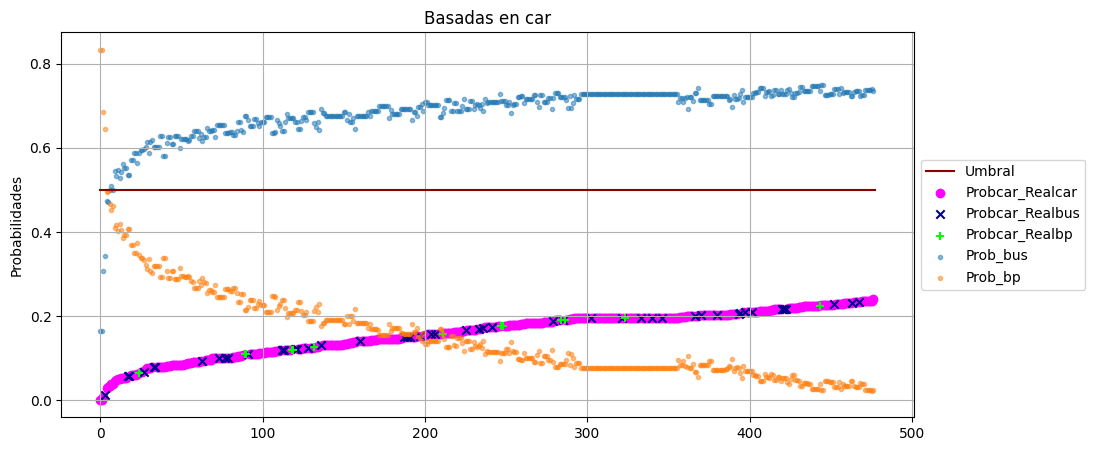

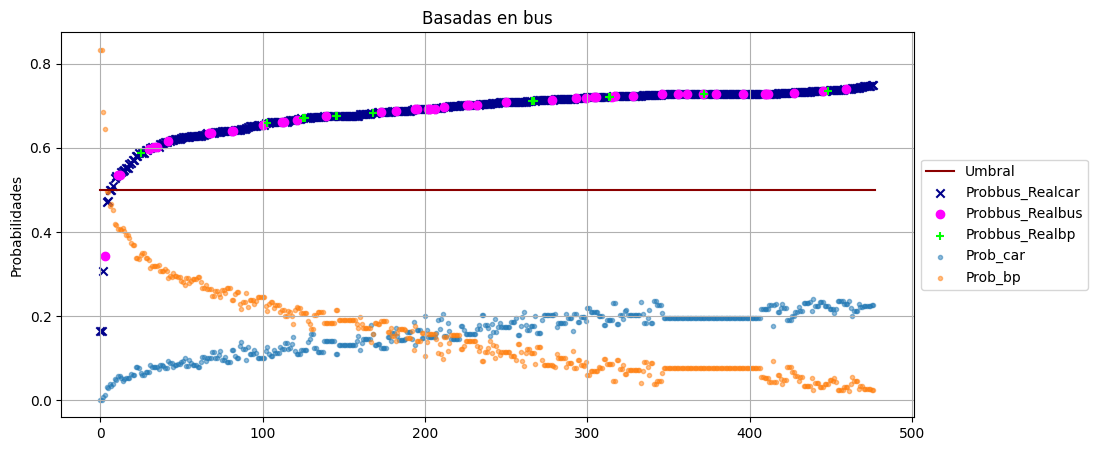

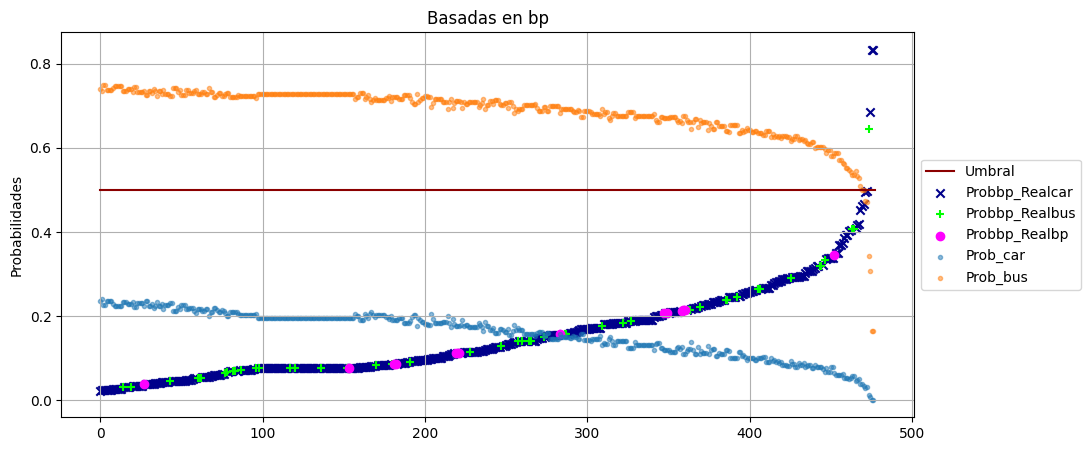

In [134]:
Display_Preds = Logit_model_pred(pandasResults, V, df_test, ['car', 'bus', 'bp'])
Display_Preds.probs_pred_NL(nests)
#Display_Preds.probs
Display_Preds.classification_report()
Display_Preds.confusion_matrix_display()
Display_Preds.ROC_curve()
# # Display_Preds.Precision_Recall_curve()
Display_Preds.Comparative_plot(0)
Display_Preds.Comparative_plot(1)
Display_Preds.Comparative_plot(2)

### Modelo 6.3 NL: NEST_NOBP

In [135]:
#Crear el Database de Biogeme a partir del df
database = db.Database('Modelo 6.3 NL: NEST_NOBP', data)

# The following statement allows you to use the names of the
# variable as Python variable.
globals().update(database.variables)

# Removing some observations
#exclude = No se eliminarán observaciones
#database.remove(exclude)

# Parameters to be estimated
# Arguments:
#   1  Name for report. Typically, the same as the variable
#   2  Starting value
#   3  Lower bound
#   4  Upper bound
#   5  0: estimate the parameter, 1: keep it fixed

#ASC_CAR = Beta('ASC_CAR', 0, None, None, 0)
#ASC_BUS = Beta('ASC_BUS', 0, None, None, 0)
ASC_BP = Beta('ASC_BP', 0, None, None, 0)
B_TIME_CAR = Beta('B_TIME_CAR', 0, None, None, 0)
B_COST_CAR = Beta('B_COST_CAR', 0, None, None, 0)
B_TIME_BUS = Beta('B_TIME_BUS', 0, None, None, 0)
B_COST_BUS = Beta('B_COST_BUS', 0, None, None, 0)
B_TIME_BP = Beta('B_TIME_BP', 0, None, None, 0)
B_COST_BP = Beta('B_COST_BP', 0, None, None, 0)

B_EDAD_CAR = Beta('B_EDAD_CAR', 0, None, None, 0)
B_EDAD_BUS = Beta('B_EDAD_BUS', 0, None, None, 0)
B_EDAD_BP = Beta('B_EDAD_BP', 0, None, None, 0)
B_SEXO_m_CAR = Beta('B_SEXO_m_CAR', 0, None, None, 0)
#B_SEXO_m_BUS = Beta('B_SEXO_m_BUS', 0, None, None, 0)
B_SEXO_m_BP = Beta('B_SEXO_m_BP', 0, None, None, 0)
B_DIST_CAR = Beta('B_DIST_CAR', 0, None, None, 0)
B_DIST_BUS = Beta('B_DIST_BUS', 0, None, None, 0)
B_DIST_BP = Beta('B_DIST_BP', 0, None, None, 0)
B_MOTIVO_hbo_CAR = Beta('B_MOTIVO_hbo_CAR', 0, None, None, 0)
B_MOTIVO_hbo_BUS = Beta('B_MOTIVO_hbo_BUS', 0, None, None, 0)
#B_MOTIVO_hbo_BP = Beta('B_MOTIVO_hbo_BP', 0, None, None, 0)
B_MOTIVO_hbws_CAR = Beta('B_MOTIVO_hbws_CAR', 0, None, None, 0)
B_MOTIVO_hbws_BUS = Beta('B_MOTIVO_hbws_BUS', 0, None, None, 0)
B_MOTIVO_hbws_BP = Beta('B_MOTIVO_hbws_BP', 0, None, None, 0)
B_ESTUDIOS_pri_termi_CAR = Beta('B_ESTUDIOS_pri_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_pri_termi_BUS = Beta('B_ESTUDIOS_pri_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_pri_termi_BP = Beta('B_ESTUDIOS_pri_termi_BP', 0, None, None, 0)
B_ESTUDIOS_sec_termi_CAR = Beta('B_ESTUDIOS_sec_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_sec_termi_BUS = Beta('B_ESTUDIOS_sec_termi_BUS', 0, None, None, 0)
B_ESTUDIOS_sec_termi_BP = Beta('B_ESTUDIOS_sec_termi_BP', 0, None, None, 0)
B_ESTUDIOS_forma_pro_CAR = Beta('B_ESTUDIOS_forma_pro_CAR', 0, None, None, 0)
B_ESTUDIOS_forma_pro_BUS = Beta('B_ESTUDIOS_forma_pro_BUS', 0, None, None, 0)
#B_ESTUDIOS_forma_pro_BP = Beta('B_ESTUDIOS_forma_pro_BP', 0, None, None, 0)
# B_ESTUDIOS_uni_termi_CAR = Beta('B_ESTUDIOS_uni_termi_CAR', 0, None, None, 0)
B_ESTUDIOS_uni_termi_BUS = Beta('B_ESTUDIOS_uni_termi_BUS', 0, None, None, 0)
#B_ESTUDIOS_uni_termi_BP = Beta('B_ESTUDIOS_uni_termi_BP', 0, None, None, 0)
B_ESTUDIOS_posgrado_CAR = Beta('B_ESTUDIOS_posgrado_CAR', 0, None, None, 0)
B_ESTUDIOS_posgrado_BUS = Beta('B_ESTUDIOS_posgrado_BUS', 0, None, None, 0)
# B_ESTUDIOS_posgrado_BP = Beta('B_ESTUDIOS_posgrado_BP', 0, None, None, 0)
B_VIAJE_OBLI_si_CAR = Beta('B_VIAJE_OBLI_si_CAR', 0, None, None, 0)
B_VIAJE_OBLI_si_BUS = Beta('B_VIAJE_OBLI_si_BUS', 0, None, None, 0)
B_VIAJE_OBLI_si_BP = Beta('B_VIAJE_OBLI_si_BP', 0, None, None, 0)
...

# Definition of the utility functions
CAR = B_COST_CAR*COSTE_CAR + B_TIME_CAR*TIEMPO_CAR + \
B_EDAD_CAR*EDAD + B_SEXO_m_CAR*SEXO_m + B_DIST_CAR*DIST_KM + \
B_MOTIVO_hbo_CAR*MOTIVO_hbo + B_MOTIVO_hbws_CAR*MOTIVO_hbws + \
B_ESTUDIOS_pri_termi_CAR*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_CAR*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_CAR*ESTUDIOS_formacion_profesional 
# B_VIAJE_OBLI_si_CAR*VIAJE_OBLIGADO_si

BUS =  B_COST_BUS*COSTE_BUS + B_TIME_BUS*TIEMPO_BUS + \
B_EDAD_BUS*EDAD +   B_DIST_BUS*DIST_KM + \
B_MOTIVO_hbo_BUS*MOTIVO_hbo + B_MOTIVO_hbws_BUS*MOTIVO_hbws + \
B_ESTUDIOS_pri_termi_BUS*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_BUS*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_forma_pro_BUS*ESTUDIOS_formacion_profesional + \
B_ESTUDIOS_uni_termi_BUS*ESTUDIOS_univers_terminada + \
B_ESTUDIOS_posgrado_BUS*ESTUDIOS_posgrado
# B_VIAJE_OBLI_si_BUS*VIAJE_OBLIGADO_si

BP = ASC_BP + B_COST_BP*COSTE_BP + B_TIME_BP*TIEMPO_BP + \
B_EDAD_BP*EDAD + B_SEXO_m_BP*SEXO_m + B_DIST_BP*DIST_KM + \
B_ESTUDIOS_pri_termi_BP*ESTUDIOS_primaria_terminada	+ \
B_ESTUDIOS_sec_termi_BP*ESTUDIOS_secundaria_terminada + \
B_ESTUDIOS_posgrado_BP*ESTUDIOS_posgrado
# B_VIAJE_OBLI_si_BP*VIAJE_OBLIGADO_si

# Associate utility functions with the numbering of alternatives
V = {0: CAR, 1: BUS, 2: BP}

# availability 
av = {0:1,
      1:1,
      2:1}

# DEFINITION OF THE NESTS:
# nest parameter 
NEST_NOBP = Beta("NEST_NOBP",1, None, None, 0)

# list of alternatives
BP = 1.0, [2]
NO_BP = NEST_NOBP, [0,1]

nests=BP, NO_BP

# The choice model is a logit, without availability conditions
logprob = models.lognested(V, av,nests, CHOICE)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = "Modelo 6.3 NL: NEST_NOBP"

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()
print(pandasResults.round(4))

                             Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_BP                    107.3126       31.0233       3.4591        0.0005
B_COST_BP                 120.8098       29.6416       4.0757        0.0000
B_COST_BUS                372.3841       62.5079       5.9574        0.0000
B_COST_CAR                199.2914       41.3651       4.8179        0.0000
B_DIST_BP                 -17.3894        3.0823      -5.6418        0.0000
B_DIST_BUS                  5.5815        2.4103       2.3157        0.0206
B_DIST_CAR                 11.8079        1.1654      10.1325        0.0000
B_EDAD_BP                  -0.0580        0.0118      -4.9320        0.0000
B_EDAD_BUS                 -0.5261        0.0881      -5.9701        0.0000
B_EDAD_CAR                  0.5841        0.0657       8.8957        0.0000
B_ESTUDIOS_forma_pro_BUS -119.1841       27.5275      -4.3296        0.0000
B_ESTUDIOS_forma_pro_CAR   43.9212        9.1997       4.7742        0.0000
B_ESTUDIOS_p

/content/gdrive/MyDrive/TFM/Script/Logit_model_pred.py:120: RuntimeWarning: overflow encountered in exp
  numerator_sum.append(sum([np.exp(matrices_utilidades[:,k]/lambdas_pos[ix]) for k in j])**(lambdas_pos[ix]-1))
/content/gdrive/MyDrive/TFM/Script/Logit_model_pred.py:121: RuntimeWarning: overflow encountered in exp
  denominator_sum.append(sum([np.exp(matrices_utilidades[:,k]/lambdas_pos[ix]) for k in j])**(lambdas_pos[ix]))
/content/gdrive/MyDrive/TFM/Script/Logit_model_pred.py:139: RuntimeWarning: overflow encountered in exp
  probs_base = np.exp(matrices_utilidades/lambdas)/(np.array(total_denom)[:, np.newaxis])
/content/gdrive/MyDrive/TFM/Script/Logit_model_pred.py:139: RuntimeWarning: invalid value encountered in true_divide
  probs_base = np.exp(matrices_utilidades/lambdas)/(np.array(total_denom)[:, np.newaxis])


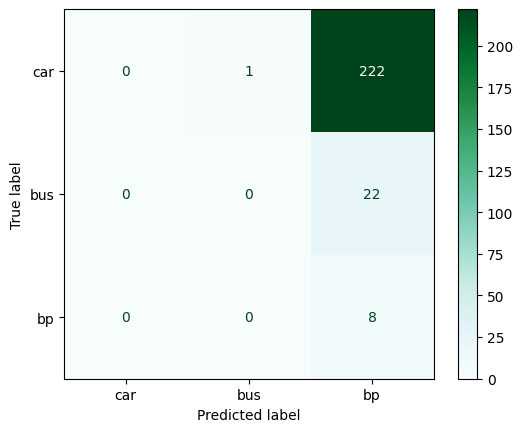

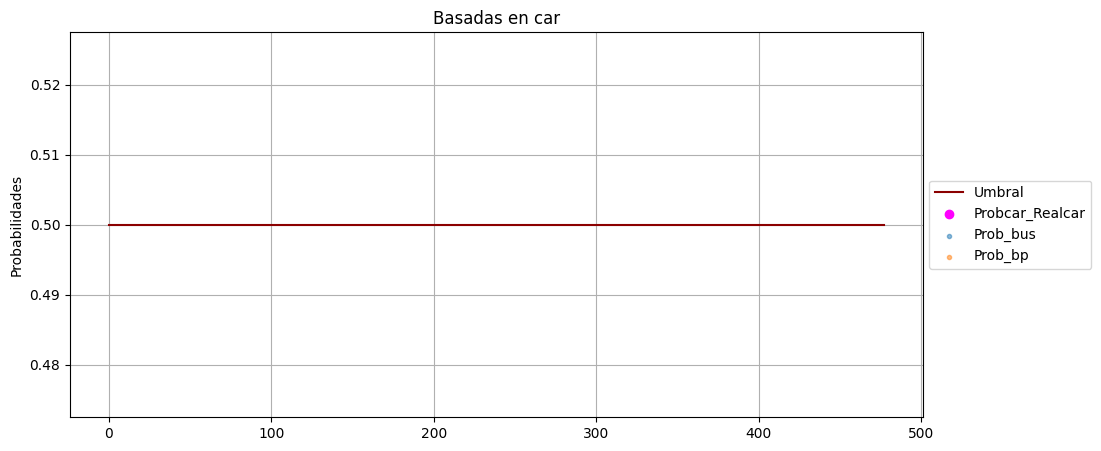

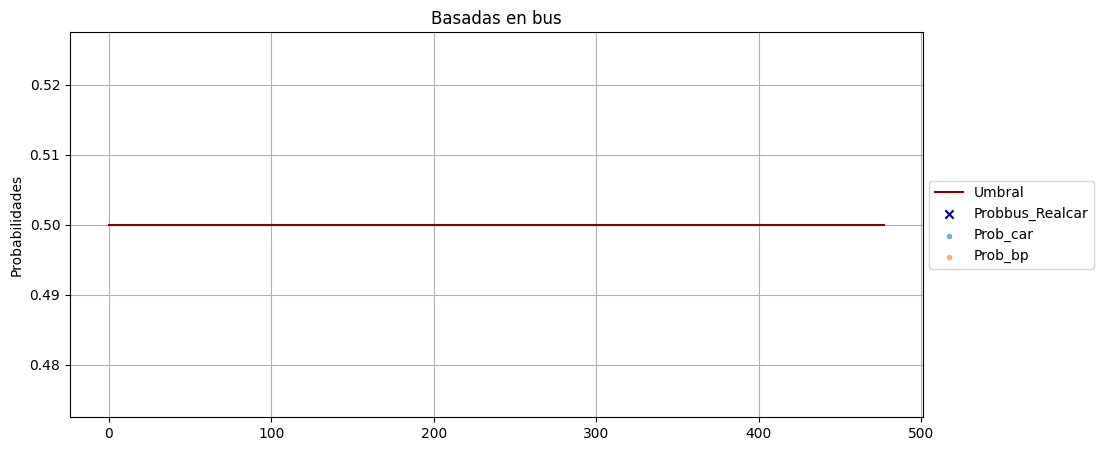

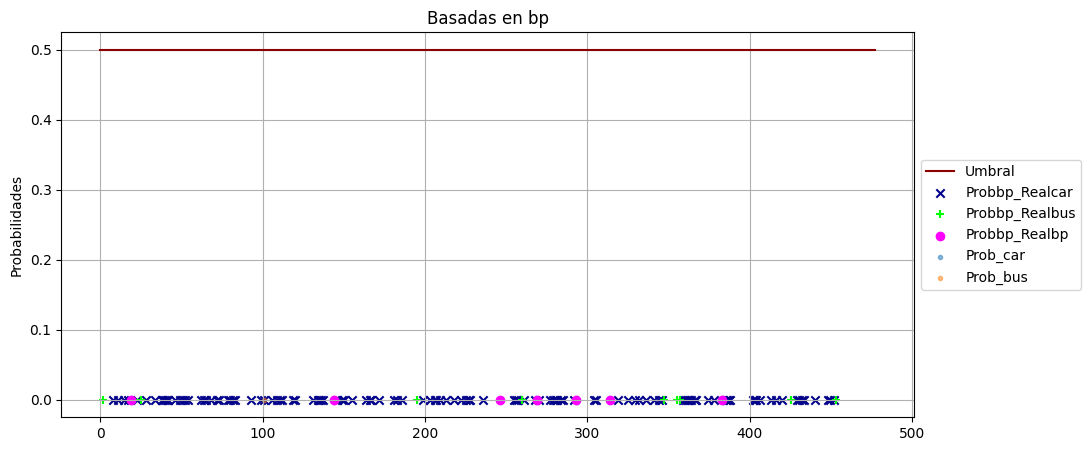

In [144]:
Display_Preds = Logit_model_pred(pandasResults, V, df_test, ['car', 'bus', 'bp'])
Display_Preds.probs_pred_NL(nests)
#Display_Preds.probs
#Display_Preds.classification_report()
Display_Preds.confusion_matrix_display()
#Display_Preds.ROC_curve()
# # Display_Preds.Precision_Recall_curve()
Display_Preds.Comparative_plot(0)
Display_Preds.Comparative_plot(1)
Display_Preds.Comparative_plot(2)

In [145]:
Display_Preds.probs

car  bus   bp
0    NaN  NaN  NaN
1    NaN  NaN  0.0
2    NaN  NaN  0.0
3    NaN  NaN  NaN
4    NaN  NaN  NaN
..   ...  ...  ...
472  NaN  NaN  NaN
473  NaN  NaN  0.0
474  NaN  NaN  0.0
475  NaN  NaN  NaN
476  NaN  NaN  NaN

[477 rows x 3 columns]

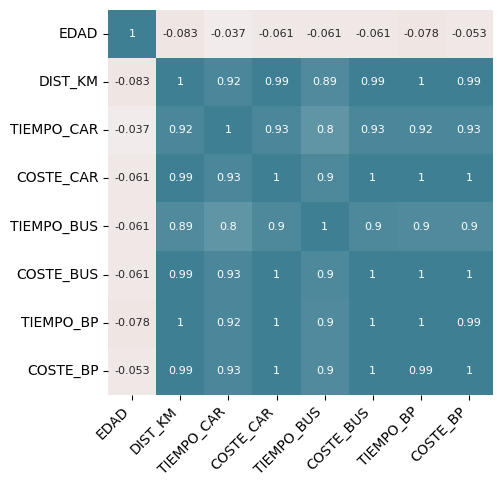

In [146]:
# Matriz de correlación
# ==============================================================================
corr_matrix = data_bc[cont].corr(method='pearson')

# Heatmap matriz de correlaciones
# ==============================================================================
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

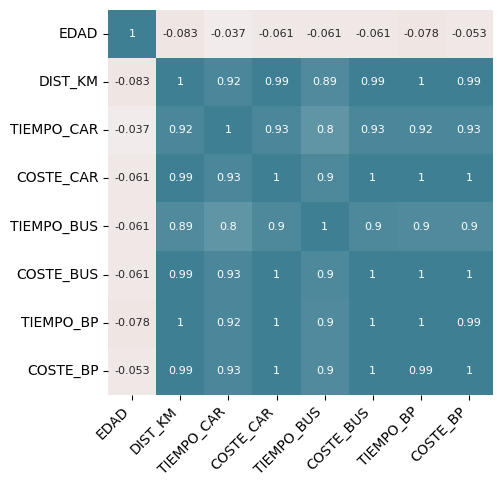

In [148]:
# Matriz de correlación
# ==============================================================================
x = data_bc[cont]
corr_matrix = x.corr(method='pearson')

# Heatmap matriz de correlaciones
# ==============================================================================
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)